In [1]:
library(Seurat)
library(SeuratWrappers)
library(ggplot2)
library(scales)
library(STACAS)
library(grid)
library(gridExtra)
library(reshape2)
library(lisi)
library(BuenColors)

Attaching SeuratObject

Loading required package: MASS



In [17]:
epcam=read.csv("ribas/NSCL/NSCL_5p_EPCAM.csv")

In [88]:
annot=read.csv("natgen_annots/NSCLC_5p_reorder.csv")

In [89]:
scvi_dense_full<-cbind(scvi_dense_umap,annot[["X1"]],scvi_cells[['orig.ident']],epcam)
colnames(scvi_dense_full) <- c("X","X0","X1","annot",'orig.ident','epcam')

ggplot(shuf(scvi_dense_full), aes(x=X0, y=X1,color=annot)) + ggtitle("Cell Type")+xlab("UMAP1")+ylab("UMAP2")+geom_point(size=.3) +theme_classic()+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
#ggsave(g,file="NSCL_5p_scvi_dense_celltypes.eps",device="eps")

ERROR: Error in data.frame(..., check.names = FALSE): object 'epcam' not found


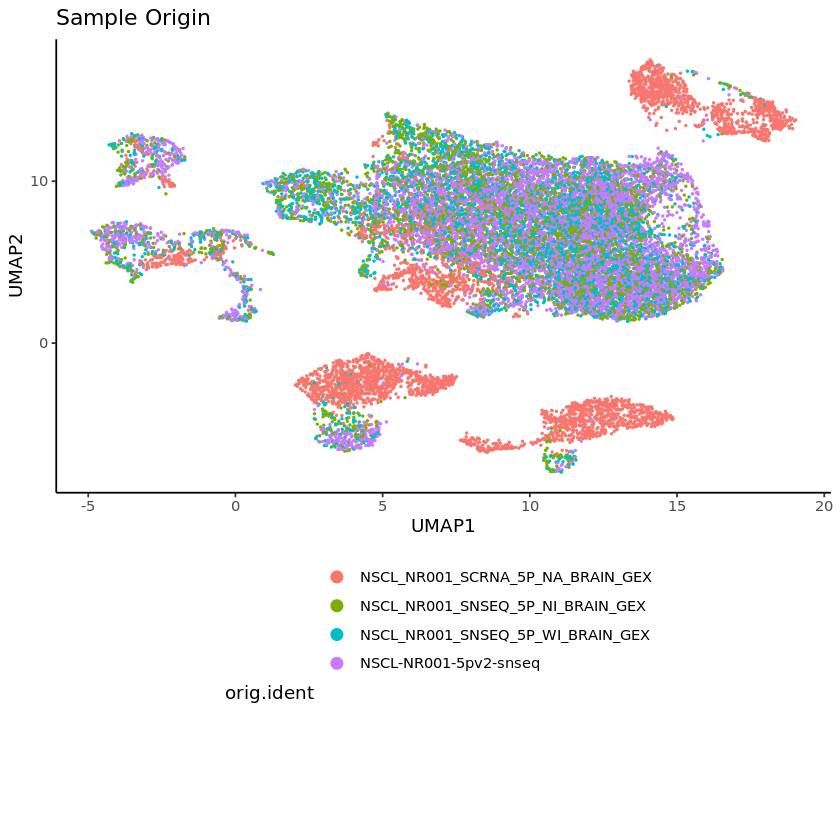

In [25]:
ggplot(shuf(scvi_dense_full), aes(x=X0, y=X1,color=orig.ident)) + ggtitle("Sample Origin")+xlab("UMAP1")+ylab("UMAP2")+ geom_point(size=.3)+theme_classic() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
#ggsave(g,file="NSCL_5p_scvi_dense_origin.eps",device="eps")

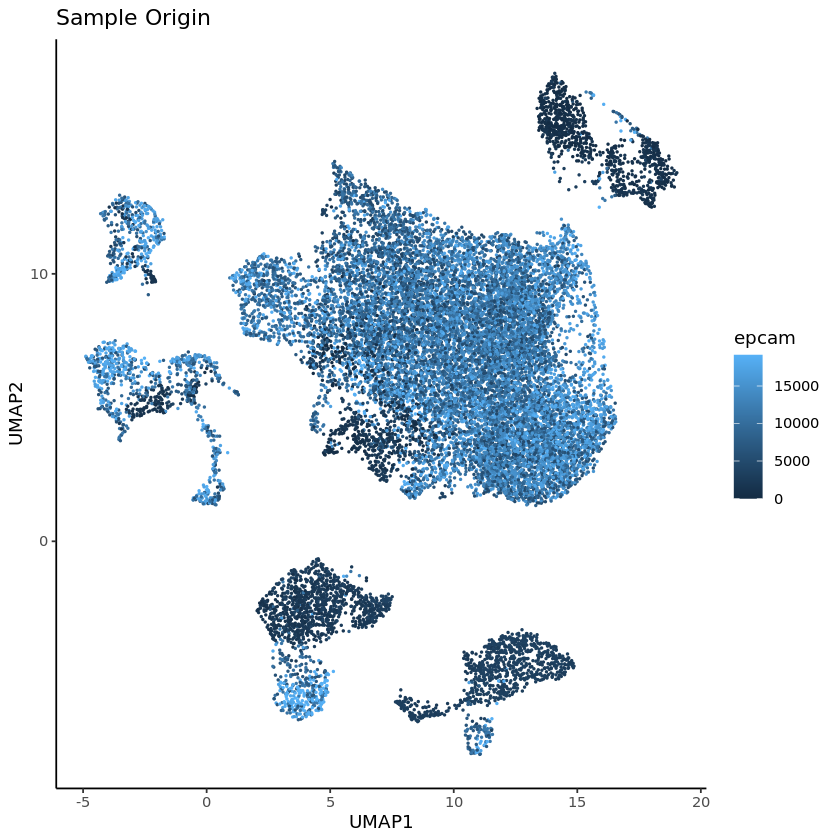

In [27]:
ggplot(shuf(scvi_dense_full), aes(x=X0, y=X1,color=epcam)) + ggtitle("Sample Origin")+xlab("UMAP1")+ylab("UMAP2")+ geom_point(size=.3)+theme_classic()

In [90]:
scvi_cells <- read.csv("ribas/NSCL_SCVI_5p_orig.ident.csv")
scvi_dense <- read.csv("ribas/NSCL/NSCL_5p_scvi_dense_pcs.csv")
scvi_dense_umap <- read.csv("ribas/NSCL/NSCL_5p_scvi_dense_umap.csv")

scvi_dense_full<-cbind(scvi_dense_umap,annot[["X1"]],scvi_cells[['orig.ident']])
colnames(scvi_dense_full) <- c("X","X0","X1","annot",'orig.ident')

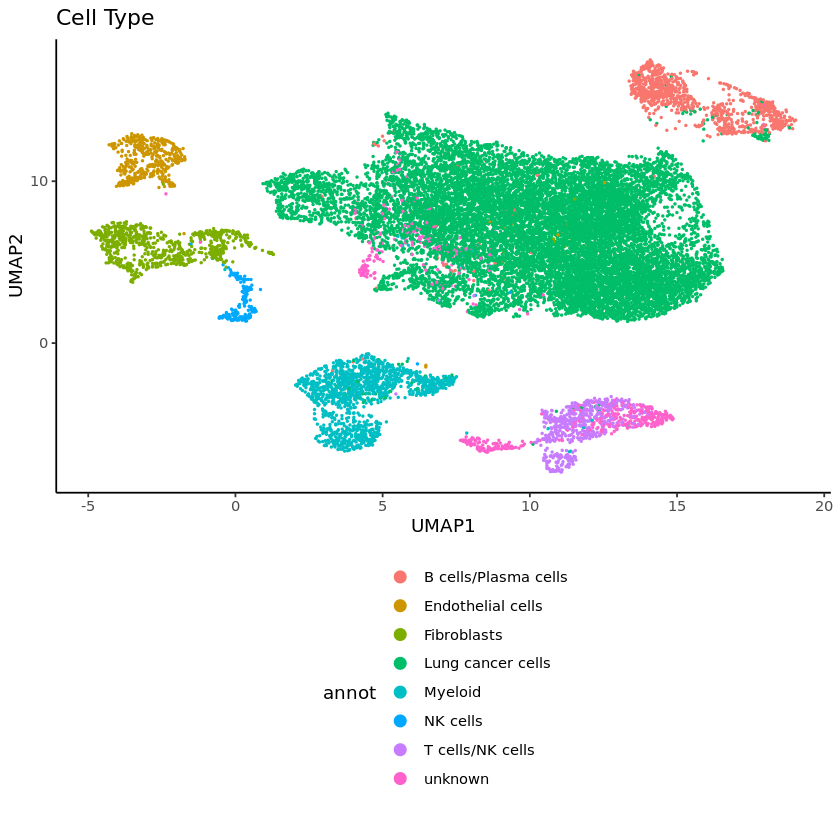

In [91]:
ggplot(shuf(scvi_dense_full), aes(x=X0, y=X1,color=annot)) + ggtitle("Cell Type")+xlab("UMAP1")+ylab("UMAP2")+geom_point(size=.3) +theme_classic()+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
#ggsave(g,file="figures/NSCLC_5p_scvi_dense_celltypes.eps",device="eps")

In [76]:
str_split(scvi_cells[["X"]][1],pattern="-")[[1]][1]

[[1]]
[1] "GTTCGGGCAGTACACT" "1"                "0"

In [81]:
str_split(annot[["X"]][1],pattern="-")[[1]][1]

[1] "GTTCGGGCAGTACACT"

In [84]:
for (i in 1: 19136) {
tmp<-str_split(scvi_cells[["X"]][1],pattern="-")[[1]][1]
tmp2<-str_split(annot[["X"]][1],pattern="-")[[1]][1]
#print(i)
if (tmp!=tmp2){
    print(tmp2)
}
}

In [10]:
g<-ggplot(shuf(scvi_dense_full), aes(x=X0, y=X1,color=orig.ident)) + ggtitle("Sample Origin")+xlab("UMAP1")+ylab("UMAP2")+ geom_point(size=.3)+theme_classic() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
ggsave(g,file="figures/NSCLC_5p_scvi_dense_origin.eps",device="eps")

Saving 6.67 x 6.67 in image



In [6]:
umap_coords=scvi_dense[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")]

labels <- scvi_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 2.045172

In [11]:
g<-ggplot(scvi_dense_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") + ggtitle("Mean LISI score: 2.05")+theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())
ggsave(g,file="figures/NSCLC_5p_scvi_dense_LISI.eps",device="eps")

Saving 6.67 x 6.67 in image



### Load Data

In [85]:
#order of cells in R is different, load different reordering of cell labels:
annot=read.csv("natgen_annots/NSCLC_5p_reorder_R.csv")

In [2]:
NSCL_NR001_SCRNA_5P_NA_=readRDS("ribas/NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX_final_thresh/NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX_final_thresh_cb.rds")

In [3]:
NSCL_NR001_5pv2_snseq=readRDS("ribas/NSCL-NR001-5pv2-snseq_final_thresh/NSCL-NR001-5pv2-snseq_final_thresh_cb.rds")

In [4]:
NSCL_NR001_SNSEQ_3P_NI_=readRDS("ribas/NSCL_NR001_SNSEQ_3P_NI_BRAIN_GEX_final_thresh/NSCL_NR001_SNSEQ_3P_NI_BRAIN_GEX_final_thresh_cb.rds")

In [5]:
NSCL_NR001_SNSEQ_3P_WI_=readRDS("ribas/NSCL_NR001_SNSEQ_3P_WI_BRAIN_GEX_final_thresh/NSCL_NR001_SNSEQ_3P_WI_BRAIN_GEX_final_thresh_cb.rds")

In [4]:
NSCL_NR001_SNSEQ_5P_NI_=readRDS("ribas/NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX_final_thresh/NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX_final_thresh_cb.rds")

In [5]:
NSCL_NR001_SNSEQ_5P_WI_=readRDS("ribas/NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX_final_thresh/NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX_final_thresh_cb.rds")

In [7]:
NSCL_merged <- merge(NSCL_NR001_SCRNA_5P_NA_, 
                     y = c(NSCL_NR001_5pv2_snseq,NSCL_NR001_SNSEQ_5P_NI_,NSCL_NR001_SNSEQ_5P_WI_), add.cell.ids = c("NSCL_NR001_SCRNA_5P_NA_","NSCL_NR001_5pv2_snseq","NSCL_NR001_SNSEQ_5P_NI_","NSCL_NR001_SNSEQ_5P_WI_"), project = "NSCL")
#NSCL_merged <- merge(NSCL_NR001_SNSEQ_5P_WI_, 
#                     y = c(NSCL_NR001_SCRNA_5P_NA_,NSCL_NR001_SNSEQ_5P_NI_,NSCL_NR001_5pv2_snseq), add.cell.ids = c("NSCL_NR001_SCRNA_5P_NA_","NSCL_NR001_SNSEQ_5P_NI_","NSCL_NR001_SNSEQ_5P_WI_","NSCL_NR001_5pv2_snseq"), project = "NSCL")


In [8]:
genes=read.csv("ribas/NSCL/NSCL_5p_hvg_list.csv",header=FALSE)

In [18]:
genes

V1        
1    AP006222.2
2    SAMD11    
3    HES4      
4    ISG15     
5    AGRN      
6    RNF223    
7    TNFRSF18  
8    TNFRSF4   
9    SDF4      
10   C1QTNF12  
11   MXRA8     
12   AURKAIP1  
13   MRPL20    
14   VWA1      
15   ATAD3C    
16   FNDC10    
17   MMP23B    
18   TMEM52    
19   GABRD     
20   AL590822.1
21   PLCH2     
22   MEGF6     
23   LINC01345 
24   AJAP1     
25   AL365255.1
26   CHD5      
27   RPL22     
28   ICMT      
29   HES2      
30   ESPN      
⋮    ⋮         
7971 CTAG2     
7972 DKC1      
7973 MPP1      
7974 VBP1      
7975 RAB39B    
7976 CLIC2     
7977 LINC00278 
7978 AC010737.1
7979 PCDH11Y   
7980 PRKY      
7981 USP9Y     
7982 UTY       
7983 NLGN4Y    
7984 TTTY14    
7985 TTTY10    
7986 MT-ND1    
7987 MT-ND2    
7988 MT-CO1    
7989 MT-CO2    
7990 MT-ATP8   
7991 MT-ATP6   
7992 MT-CO3    
7993 MT-ND3    
7994 MT-ND4L   
7995 MT-ND4    
7996 MT-ND5    
7997 MT-ND6    
7998 MT-CYB    
7999 AC136616.1
8000 AC007325.2

In [9]:
mat<-as.data.frame(GetAssayData(object = NSCL_merged, slot = "counts"))

In [10]:
NSCL_merged=CreateSeuratObject(mat[unlist(genes),], project = "NSCL", assay = "RNA",meta.data = NSCL_merged@meta.data)


In [11]:
NSCL_merged.list <- SplitObject(NSCL_merged,split.by='orig.ident')

### Raw Control

In [54]:
NSCL_merged <- NormalizeData(NSCL_merged)
NSCL_merged <- FindVariableFeatures(NSCL_merged)

In [55]:
NSCL_merged <- ScaleData(NSCL_merged)
NSCL_merged <- RunPCA(NSCL_merged, features = NSCL_merged@assays$RNA@var.features, ndims.print = 1:5, nfeatures.print = 5)

Centering and scaling data matrix

PC_ 1 
Positive:  ATP5F1E, RPL36, RPL37, RPL37A, RPL26 
Negative:  AC024230.1, CACNA1A, RIMKLB, KCNIP4, LINC00299 
PC_ 2 
Positive:  NTS, AGR2, MUC13, CLDN7, EPCAM 
Negative:  IGFBP7, COL4A1, COL4A2, SPARC, SPARCL1 
PC_ 3 
Positive:  KRT18, IGFBP2, AGR2, KRT8, TFF3 
Negative:  TYROBP, FCER1G, AIF1, HLA-DPB1, HLA-DPA1 
PC_ 4 
Positive:  MZB1, DERL3, PIM2, CD79A, JCHAIN 
Negative:  CD68, CST3, APOE, CTSB, TMEM176B 
PC_ 5 
Positive:  VWF, PLVAP, KDR, CD34, CYYR1 
Negative:  COL1A2, PDGFRB, COL3A1, COL1A1, EDNRA 



In [56]:
ndim=10
NSCL_merged <- RunUMAP(NSCL_merged, reduction = "pca", dims = 1:ndim, seed.use=123)


05:46:15 UMAP embedding parameters a = 0.9922 b = 1.112

05:46:15 Read 19136 rows and found 10 numeric columns

05:46:15 Using Annoy for neighbor search, n_neighbors = 30

05:46:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

05:46:17 Writing NN index file to temp file /tmp/Rtmp30ccqt/file9fc6abf4068

05:46:17 Searching Annoy index using 1 thread, search_k = 3000

05:46:22 Annoy recall = 100%

05:46:22 Commencing smooth kNN distance calibration using 1 thread

05:46:23 Initializing from normalized Laplacian + noise

05:46:25 Commencing optimization for 200 epochs, with 775598 positive edges

05:46:33 Optimization finished



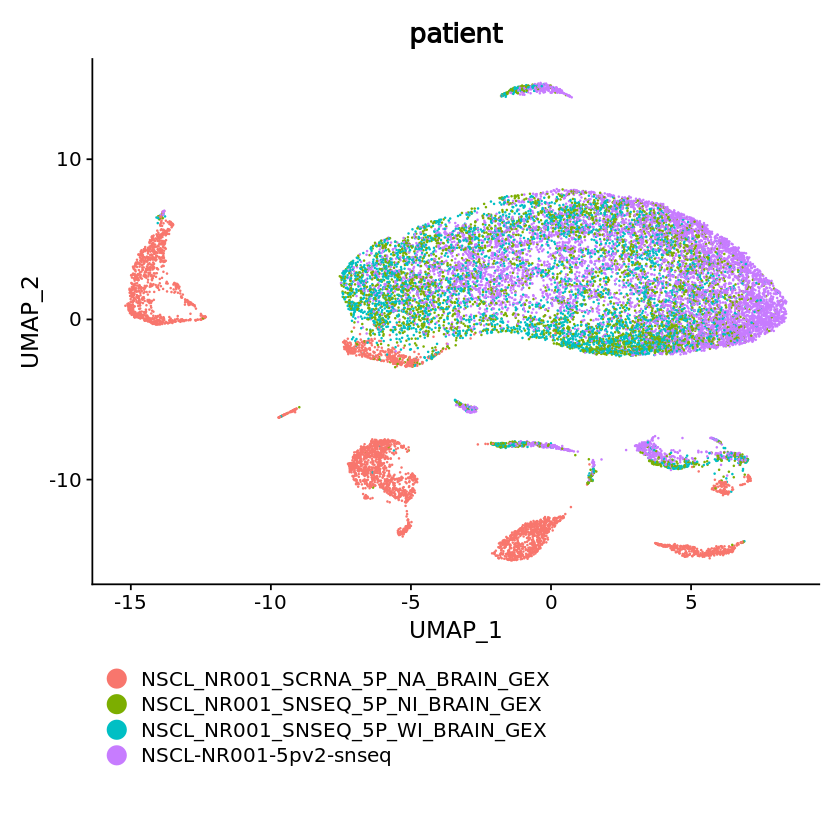

In [5]:
DimPlot(NSCL_merged, group.by = c("patient"), ncol = 1, shuffle=TRUE)+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 6, override.aes = list(size=5)))


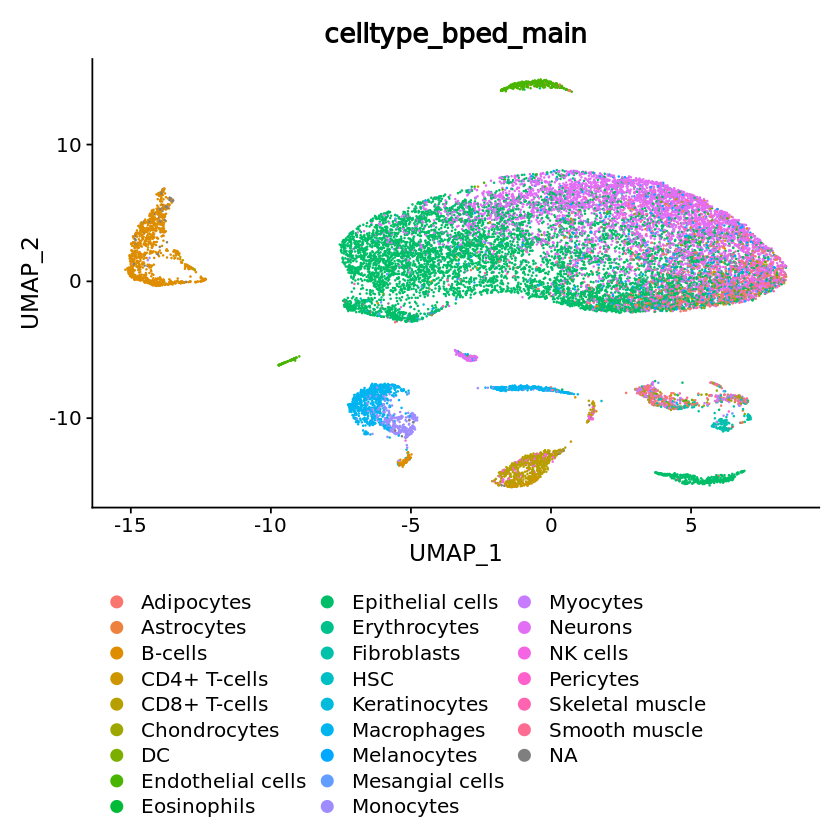

In [6]:
DimPlot(NSCL_merged, group.by = c("celltype_bped_main"), ncol = 1, shuffle=TRUE)+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [41]:
NSCL_merged=readRDS("ribas/NSCL/NSCL_5p_raw_Seurat.rds")

In [7]:
pcs=prcomp(t(as.matrix(NSCL_merged@assays$RNA[c(1:8000)])),rank=20)

In [8]:
#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.476958

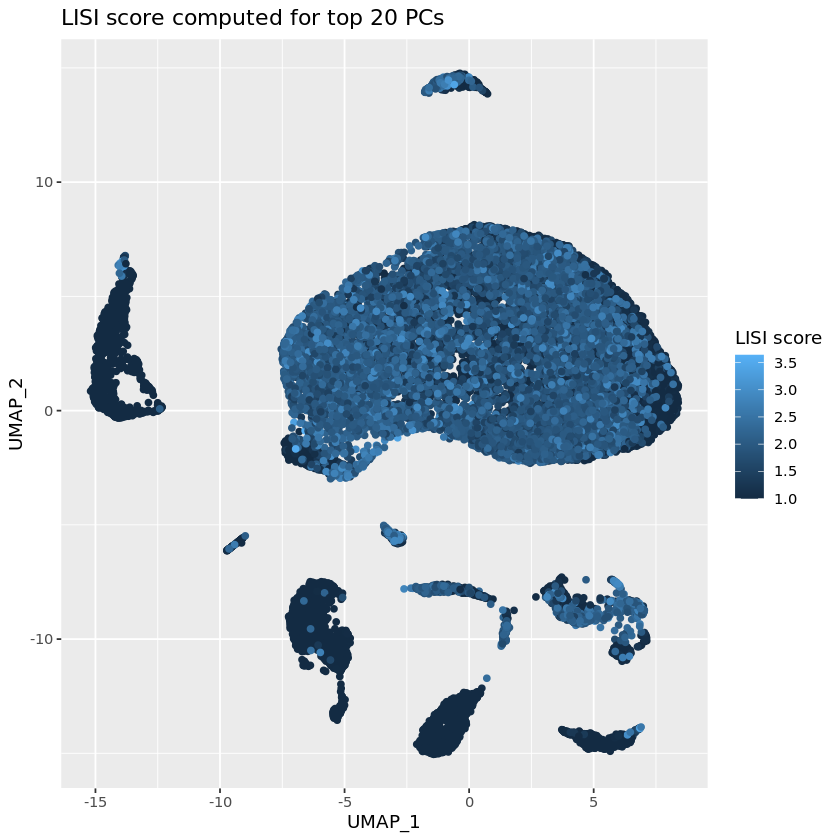

In [9]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("LISI score computed for top 20 PCs")

In [11]:

annot=read.csv("ribas/DEGs/NSCL_5p_annotations")

In [93]:
saveRDS(NSCL_merged,"ribas/NSCL/NSCL_5p_raw_Seurat.rds")

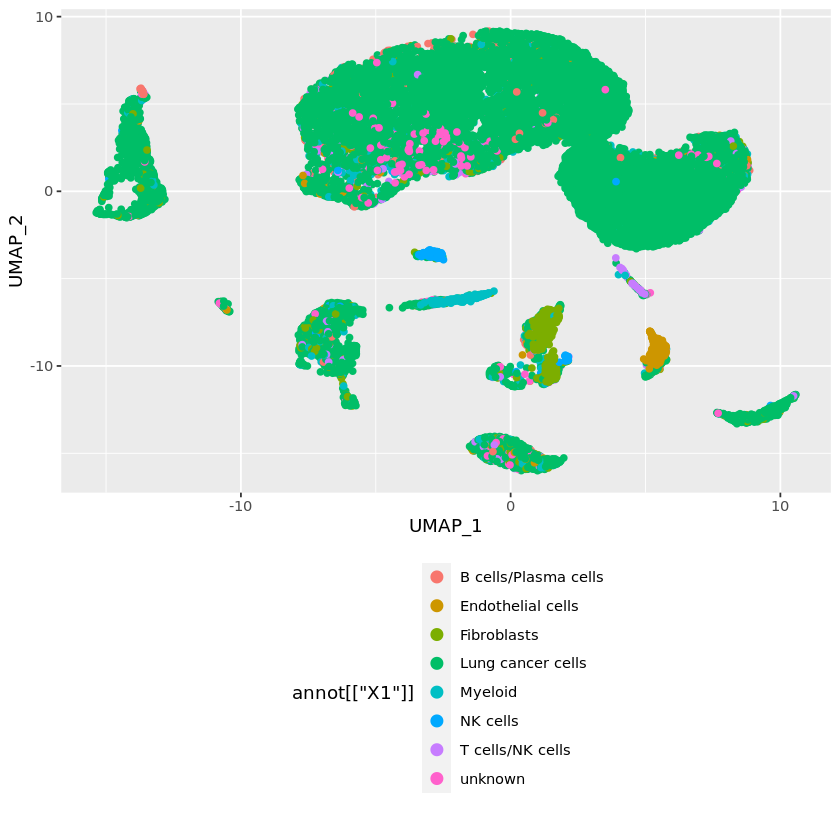

In [57]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X1"]])) + 
  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### Seurat Integration

In [12]:
NSCL_merged.list <- lapply(X = NSCL_merged.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [13]:
features <- SelectIntegrationFeatures(object.list = NSCL_merged.list)

In [14]:
immune.anchors <- FindIntegrationAnchors(object.list = NSCL_merged.list, anchor.features = features)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8463 anchors

Filtering anchors

	Retained 806 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6323 anchors

Filtering anchors

	Retained 1283 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 12638 anchors

Filtering anchors

	Retained 8360 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6718 anchors

Filtering anchors

	Retained 1231 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 13127 anchors

Filtering anchors

	Retained 8702 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 10371 anchors

Filtering anchors

	Retained 6999 anchors



In [15]:
# this command creates an 'integrated' data assay
immune.combined <- IntegrateData(anchorset = immune.anchors)

Merging dataset 3 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 into 2 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 2 3 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [16]:
DefaultAssay(immune.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 30, verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:30)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:30)
immune.combined <- FindClusters(immune.combined, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:09:36 UMAP embedding parameters a = 0.9922 b = 1.112

22:09:36 Read 19136 rows and found 30 numeric columns

22:09:36 Using Annoy for neighbor search, n_neighbors = 30

22:09:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:09:38 Writing NN index file to temp file /tmp/RtmpLIGldN/file7ad1f75cb1b

22:09:38 Searching Annoy index using 1 thread, search_k = 3000

22:09:43 Annoy recall = 100%

22:09:44 Commencing smooth kNN distance calibration using 1 thread

22:09:44 Initializing fro

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19136
Number of edges: 643081

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8958
Number of communities: 17
Elapsed time: 2 seconds


In [28]:
p2 <- DimPlot(immune.combined, group.by = c("patient"), reduction = "umap", shuffle=TRUE, repel = TRUE)+ theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [20]:
immune.combined$RNA

Assay data with 8000 features for 19136 cells
First 10 features:
 AP006222.2, SAMD11, HES4, ISG15, AGRN, RNF223, TNFRSF18, TNFRSF4, SDF4,
C1QTNF12 

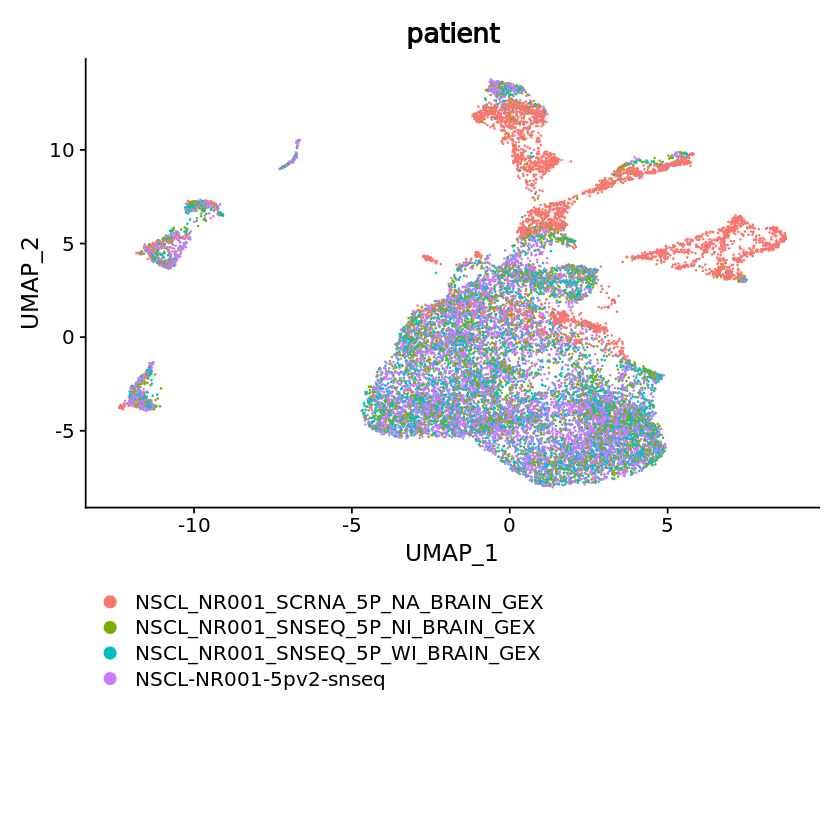

In [29]:
p2

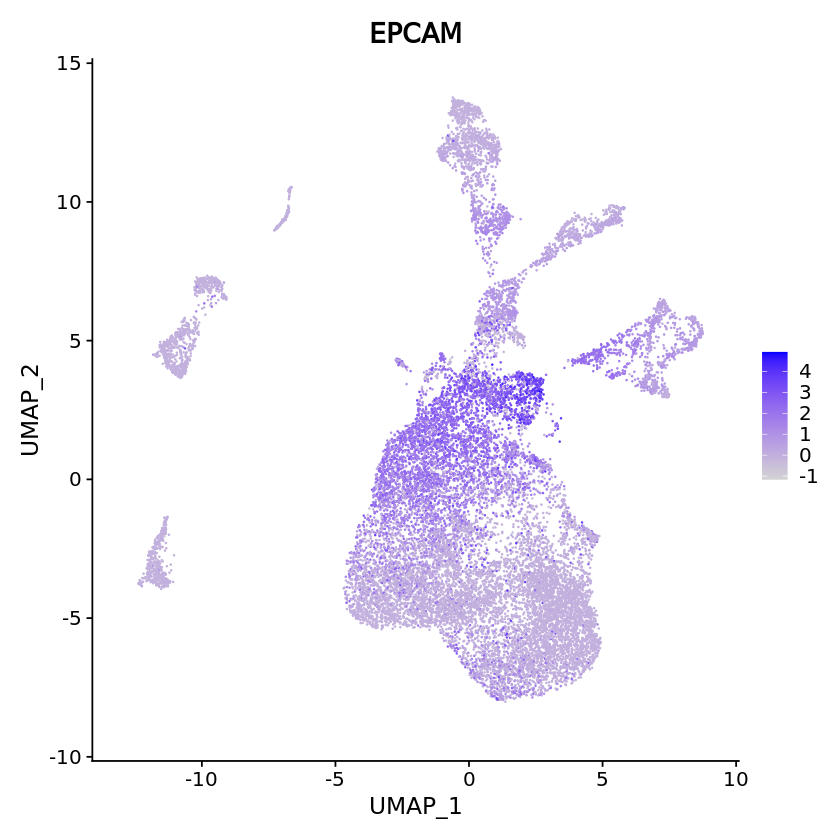

In [42]:
FeaturePlot(immune.combined, features = c("EPCAM"), reduction = "umap")

In [27]:
pcs=prcomp(t(as.matrix(immune.combined$integrated[c(1:2000)])),rank=20)

#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 2.255756

In [37]:
g<-ggplot(as.data.frame(immune.combined[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("Mean LISI Score: 2.26")+ ggtitle("Mean LISI score: 1.23")+theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())
ggsave(g,file="figures/NSCL_5p_seuratCCA_LISI.eps",device="eps")

Saving 6.67 x 6.67 in image



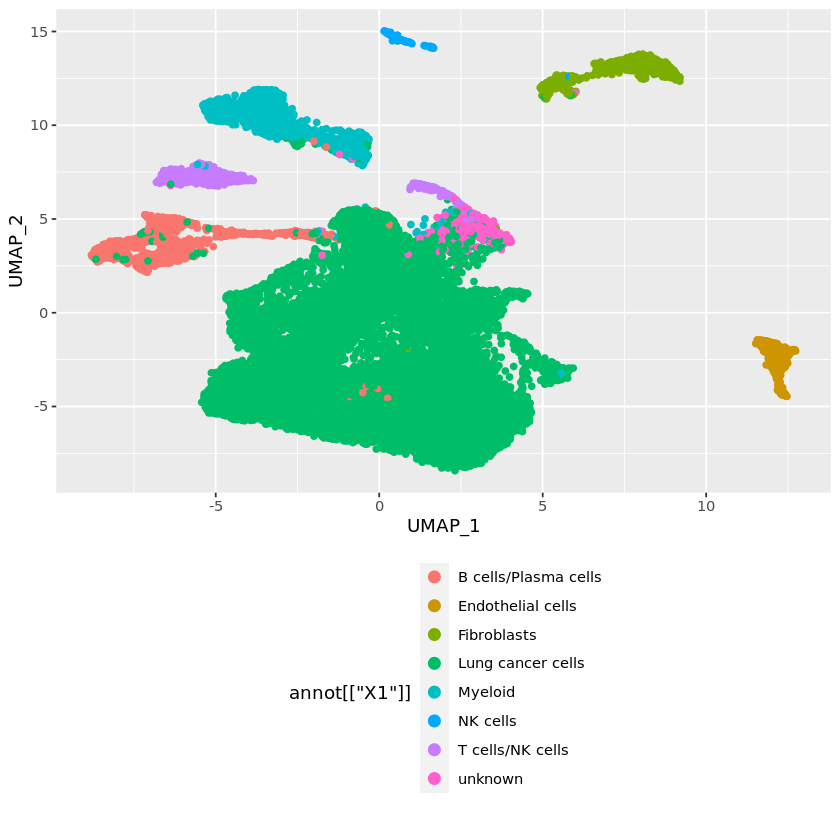

In [38]:
ggplot(as.data.frame(immune.combined[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X1"]])) + 
  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


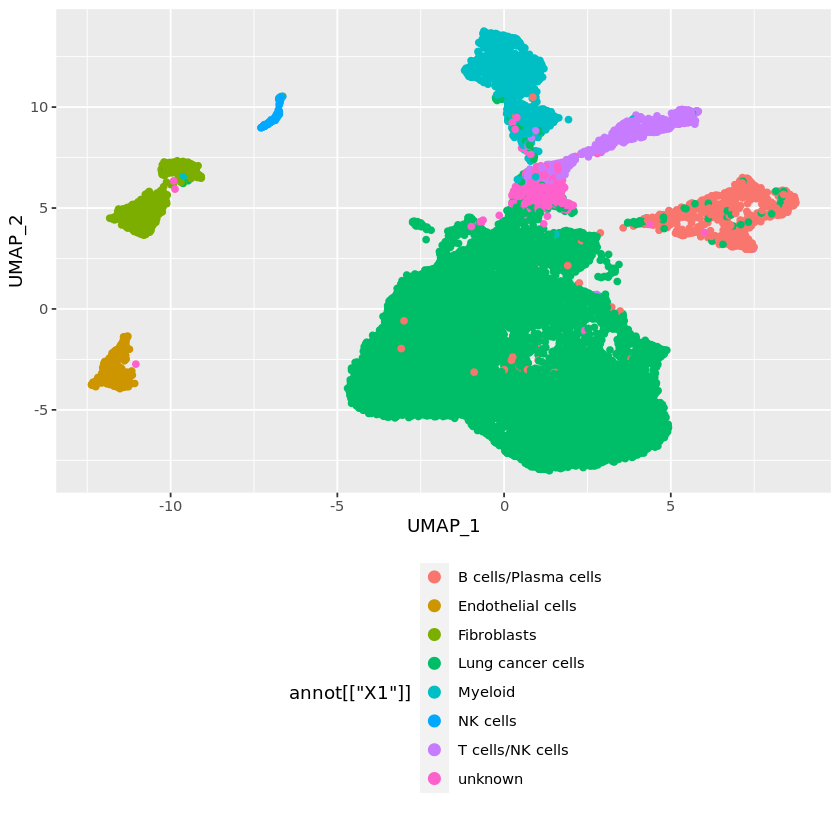

In [30]:
ggplot(as.data.frame(immune.combined[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X1"]])) + 
  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [36]:
immune.combined$RNA

Assay data with 8000 features for 19136 cells
First 10 features:
 AP006222.2, SAMD11, HES4, ISG15, AGRN, RNF223, TNFRSF18, TNFRSF4, SDF4,
C1QTNF12 

In [2]:
immune.combined=readRDS("ribas/NSCL/NSCL_5p_raw_Seurat_Integrated.rds")

In [38]:
saveRDS(immune.combined,"ribas/NSCL/NSCL_5p_raw_Seurat_Integrated.rds")

In [58]:
immune.combined

An object of class Seurat 
10000 features across 19136 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [39]:
scvi_dense_full<-cbind(immune.combined[["umap"]]@cell.embeddings,annot[["X1"]],immune.combined$patient)
colnames(scvi_dense_full) <- c("X0","X1","annot",'orig.ident')

g<-ggplot(shuf(as.data.frame(scvi_dense_full)), aes(x=as.double(X0), y=as.double(X1),color=annot)) + ggtitle("Cell Type")+xlab("UMAP1")+ylab("UMAP2")+geom_point(size=.3) +theme_classic()+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
ggsave(g,file="figures/NSCL_5p_seuratCCA_celltype.eps",device="eps")

Saving 6.67 x 6.67 in image



In [40]:
g<-ggplot(shuf(as.data.frame(scvi_dense_full)), aes(x=as.double(X0), y=as.double(X1),color=orig.ident)) + ggtitle("Sample Origin")+xlab("UMAP1")+ylab("UMAP2")+ geom_point(size=.3)+theme_classic() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
ggsave(g,file="figures/NSCL_5p_seuratCCA_origin.eps",device="eps")

Saving 6.67 x 6.67 in image



### STACAS

In [144]:
var.genes.n <- 800
var.genes.integrated.n <- 500

for (i in 1:length(NSCL_merged.list)) {
    NSCL_merged.list[[i]] <- NormalizeData(NSCL_merged.list[[i]], verbose = FALSE)
    
    NSCL_merged.list[[i]] <- FindVariableFeatures(NSCL_merged.list[[i]], selection.method = "vst", 
        nfeatures = var.genes.n*2, verbose = FALSE)
    
    #mito.genes <- grep(pattern = "^mt-", rownames(ref.list[[i]]), value = TRUE)
    #ribo.genes <- grep(pattern = "^Rp[ls]", rownames(ref.list[[i]]), value = TRUE)
    
    #ref.list[[i]]@assays$RNA@var.features <- setdiff(ref.list[[i]]@assays$RNA@var.features, cellCycle.symbol)
    #ref.list[[i]]@assays$RNA@var.features <- setdiff(ref.list[[i]]@assays$RNA@var.features, mito.genes)
    #ref.list[[i]]@assays$RNA@var.features <- setdiff(ref.list[[i]]@assays$RNA@var.features, ribo.genes)
    NSCL_merged.list[[i]]@assays$RNA@var.features <- head( NSCL_merged.list[[i]]@assays$RNA@var.features, var.genes.n)
}

In [145]:
ndim=10
ref.anchors <- FindAnchors.STACAS(NSCL_merged.list, dims=1:ndim, anchor.features=var.genes.integrated.n)

Computing 500 integration features

Preparing PCA embeddings for objects...



 1/4 2/4 3/4 4/4


Computing within dataset neighborhoods

Finding all pairwise anchors

Finding neighborhoods

Finding anchors

	Found 384 anchors

Finding neighborhoods

Finding anchors

	Found 644 anchors

Finding neighborhoods

Finding anchors

	Found 7103 anchors

Finding neighborhoods

Finding anchors

	Found 687 anchors

Finding neighborhoods

Finding anchors

	Found 7305 anchors

Finding neighborhoods

Finding anchors

	Found 7457 anchors



In [146]:
names <- names(NSCL_merged.list)

plots <- PlotAnchors.STACAS(ref.anchors, obj.names=names)

g.cols <- 2
g.rows <- as.integer((length(plots)+2)/g.cols)
g <- do.call("arrangeGrob", c(plots, ncol=g.cols, nrow=g.rows))

Picking joint bandwidth of 0.0349

Picking joint bandwidth of 0.0202

Picking joint bandwidth of 0.0194

Picking joint bandwidth of 0.0188



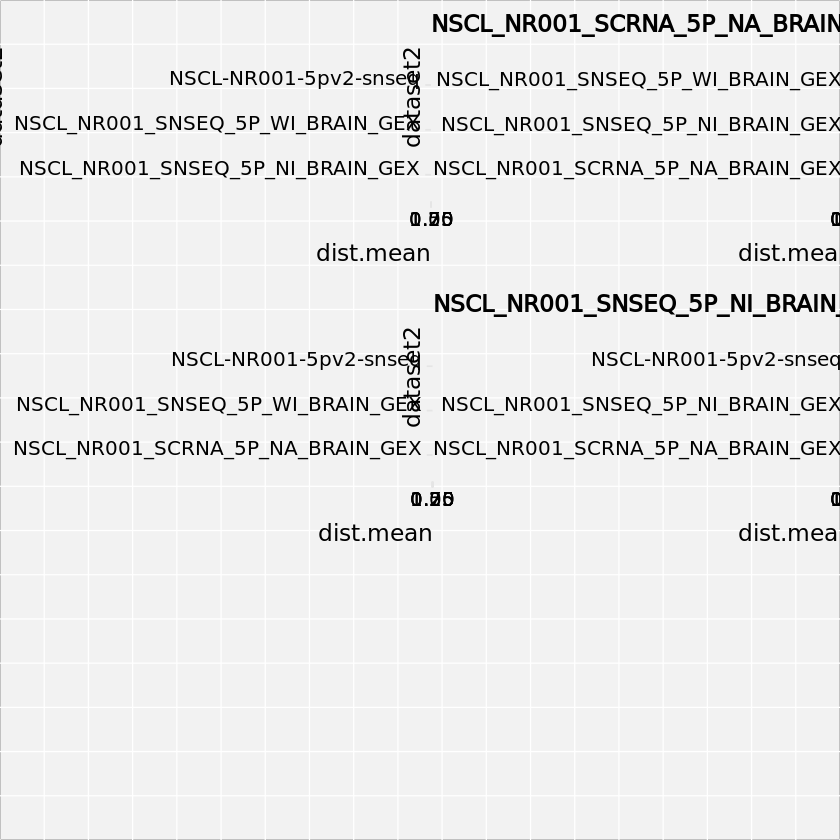

In [147]:
plot(g,combine=FALSE)

In [148]:
ref.anchors.filtered <- FilterAnchors.STACAS(ref.anchors)

Filter anchors using distance threshold t=0.927



In [149]:
#Before
anchor.stats.before <- table(ref.anchors@anchors[,c("dataset1","dataset2")])

#After
anchor.stats.after <- table(ref.anchors.filtered@anchors[,c("dataset1","dataset2")])

rownames(anchor.stats.before) <- names(NSCL_merged.list)
colnames(anchor.stats.before) <- names(NSCL_merged.list)
rownames(anchor.stats.after) <- names(NSCL_merged.list)
colnames(anchor.stats.after) <- names(NSCL_merged.list)
anchor.stats.before

                                  dataset2
dataset1                           NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX
  NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX                                0
  NSCL-NR001-5pv2-snseq                                         384
  NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX                              644
  NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX                              687
                                  dataset2
dataset1                           NSCL-NR001-5pv2-snseq
  NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX                   384
  NSCL-NR001-5pv2-snseq                                0
  NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX                  7103
  NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX                  7305
                                  dataset2
dataset1                           NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX
  NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX                              644
  NSCL-NR001-5pv2-snseq                                        7103
  NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX        

In [150]:
anchor.stats.after

                                  dataset2
dataset1                           NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX
  NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX                                0
  NSCL-NR001-5pv2-snseq                                         228
  NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX                              430
  NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX                              465
                                  dataset2
dataset1                           NSCL-NR001-5pv2-snseq
  NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX                   228
  NSCL-NR001-5pv2-snseq                                0
  NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX                  5682
  NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX                  5608
                                  dataset2
dataset1                           NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX
  NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX                              430
  NSCL-NR001-5pv2-snseq                                        5682
  NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX        

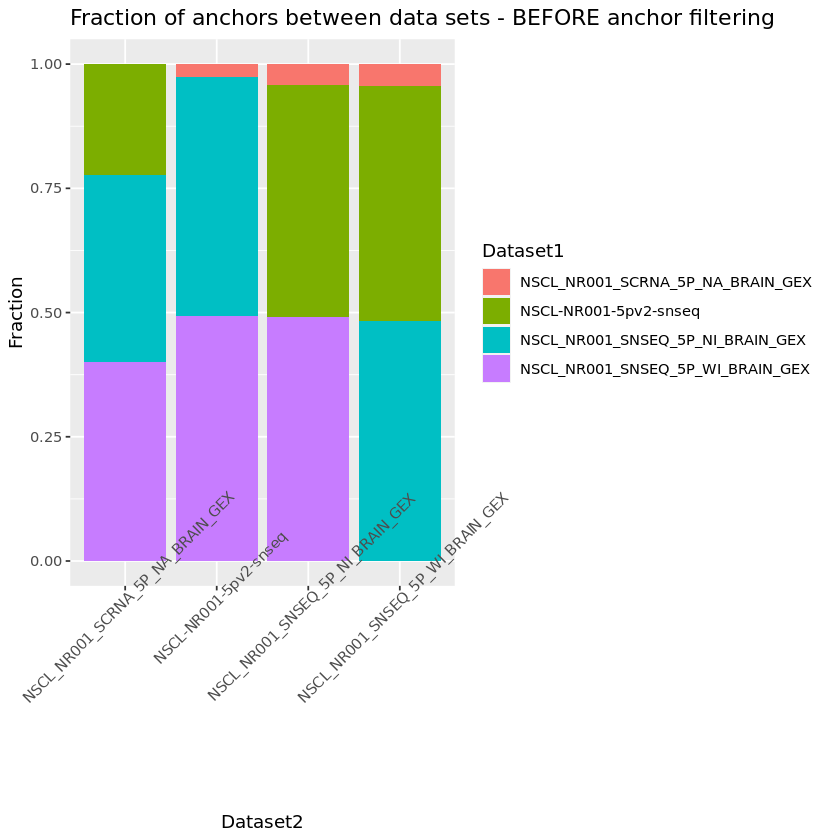

In [151]:
anchor.stats.before.norm <- apply(anchor.stats.before, 1, function(x) {x/sum(x)})
toplot <- melt(anchor.stats.before.norm, varnames=c("Dataset1","Dataset2"), value.name = "Fraction")
ggplot(toplot, aes(fill=Dataset1, y=Fraction, x=Dataset2)) + 
    geom_bar(position="stack", stat="identity") +
  theme(axis.text.x = element_text(angle = 45)) +
    ggtitle("Fraction of anchors between data sets - BEFORE anchor filtering")

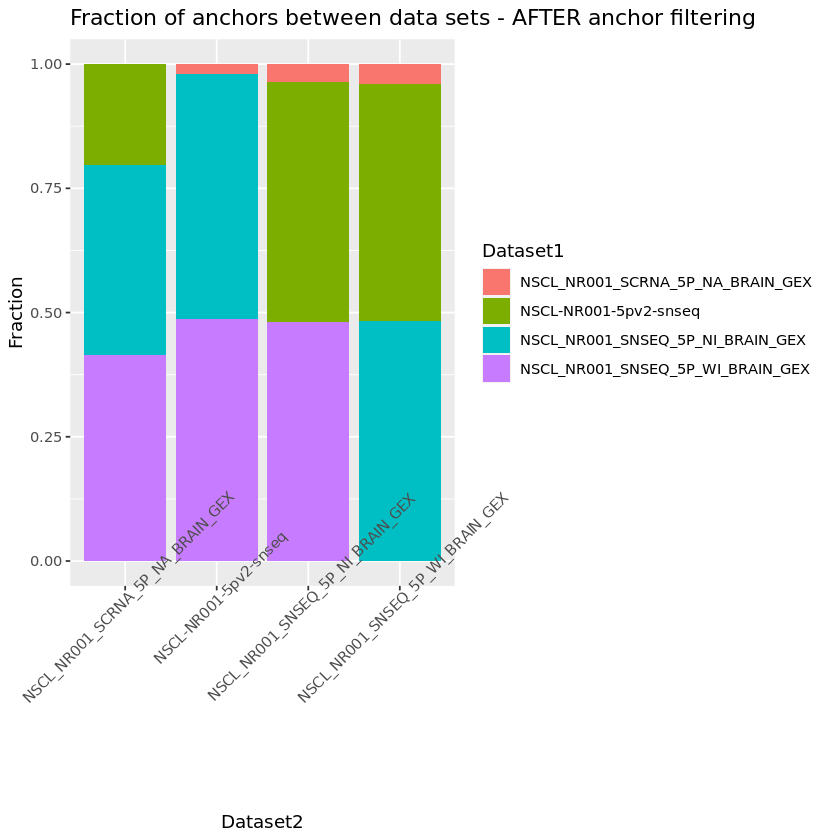

In [152]:
anchor.stats.after.norm <- apply(anchor.stats.after, 1, function(x) {x/sum(x)})
toplot <- melt(anchor.stats.after.norm, varnames=c("Dataset1","Dataset2"), value.name = "Fraction")
ggplot(toplot, aes(fill=Dataset1, y=Fraction, x=Dataset2)) + 
    geom_bar(position="stack", stat="identity") +
  theme(axis.text.x = element_text(angle = 45)) +
    ggtitle("Fraction of anchors between data sets - AFTER anchor filtering")

In [153]:
all.genes <- row.names(NSCL_merged.list[[1]])
for (i in 2:length(NSCL_merged.list)) {
   all.genes <- intersect(all.genes, row.names(NSCL_merged.list[[i]]))
}

mySampleTree <- SampleTree.STACAS(ref.anchors.filtered)
print(mySampleTree)

     [,1] [,2]
[1,]   -3   -2
[2,]    1   -4
[3,]    2   -1


In [154]:
ref.integrated <- IntegrateData(anchorset=ref.anchors.filtered, dims=1:ndim, features.to.integrate=all.genes,
                                sample.tree=mySampleTree, preserve.order=T)

Merging dataset 2 into 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 into 3 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 3 2 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [155]:
ndim=15
length(ref.integrated@assays$integrated@var.features)

ref.integrated <- ScaleData(ref.integrated, verbose = TRUE)
ref.integrated <- RunPCA(ref.integrated, features = ref.integrated@assays$integrated@var.features,
                         ndims.print = 1:5, nfeatures.print = 5)

ndim=10  #how many PCA components to retain

ref.integrated <- RunUMAP(ref.integrated, reduction = "pca", dims = 1:ndim, seed.use=123, n.neighbors = 30, min.dist=0.3)


[1] 500

Centering and scaling data matrix

PC_ 1 
Positive:  IGFBP7, COL4A1, COL4A2, SPARC, FN1 
Negative:  CALCA, GP2, NTS, MUC13, SDF2L1 
PC_ 2 
Positive:  DRAIC, LINC01811, PAM, COLEC10, LINC00261 
Negative:  RPS8, RPS14, RPL28, RPS12, RPLP1 
PC_ 3 
Positive:  PECAM1, FYB1, CHST11, HLA-DRA, TMSB4X 
Negative:  AGT, AGR2, MUC13, PCSK1, IGFBP2 
PC_ 4 
Positive:  MIR99AHG, PDGFRB, COL1A2, SEMA5A, COL3A1 
Negative:  VWF, PLVAP, KDR, EGFL7, CD34 
PC_ 5 
Positive:  PLXDC1, NOTCH3, RGS5, CARMN, GRM8 
Negative:  PCDH9, IL1RAPL1, NCAM2, ERBB4, CDH19 

01:22:12 UMAP embedding parameters a = 0.9922 b = 1.112

01:22:12 Read 19136 rows and found 10 numeric columns

01:22:12 Using Annoy for neighbor search, n_neighbors = 30

01:22:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

01:22:1

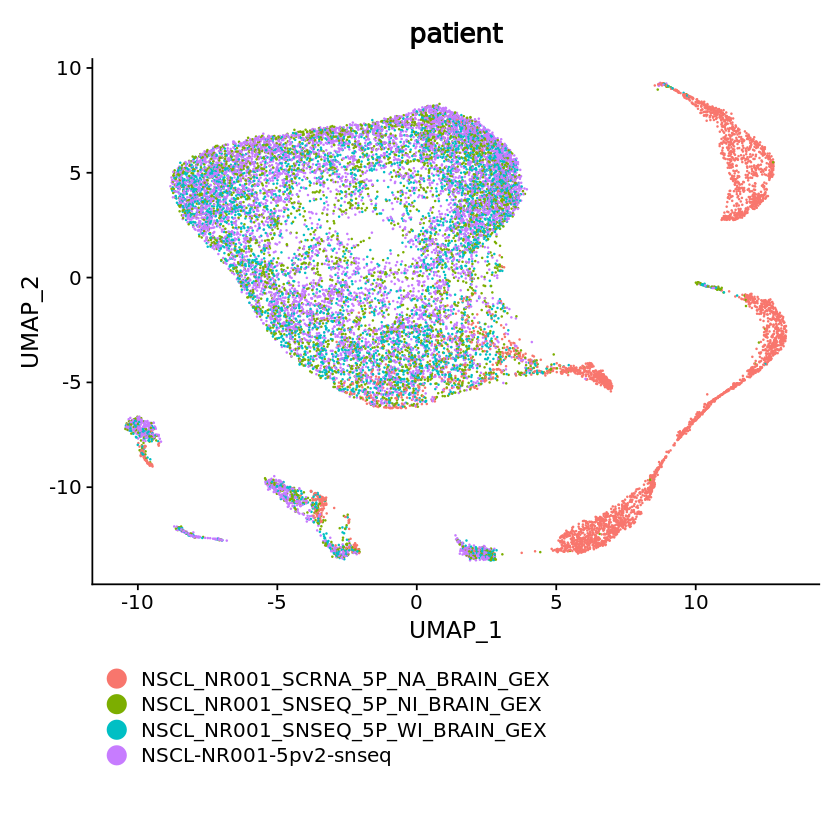

In [156]:
DimPlot(ref.integrated, reduction = "umap", group.by = "patient", shuffle=TRUE) +theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 6, override.aes = list(size=5)))


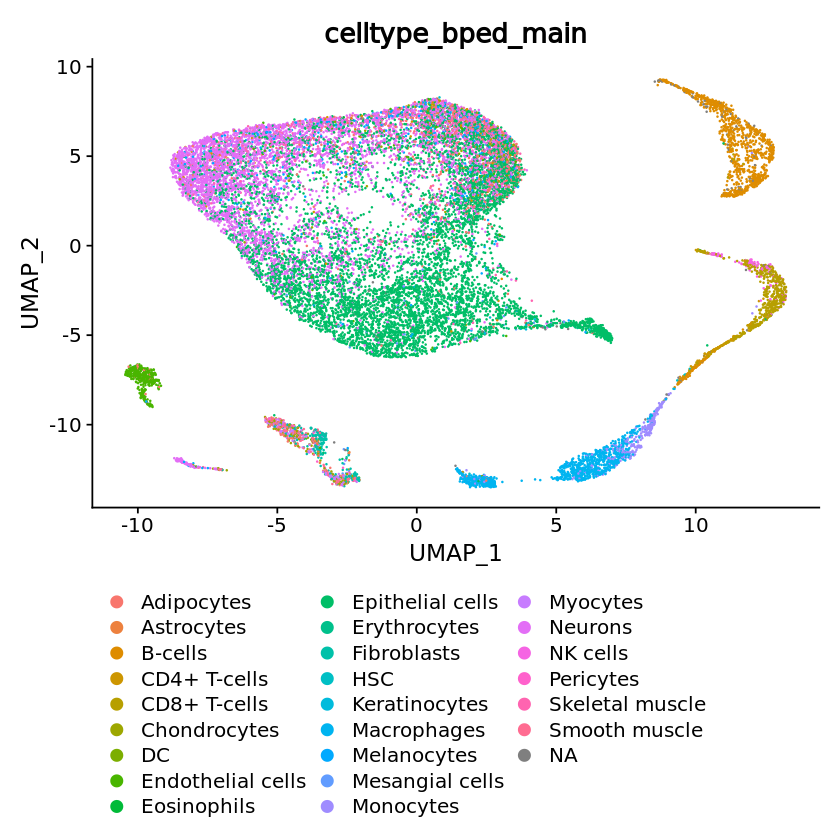

In [157]:
DimPlot(ref.integrated, reduction = "umap", group.by = "celltype_bped_main", shuffle=TRUE) +theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [5]:
stacas=readRDS("ribas/NSCL/NSCL_5p_STACAS_merged.rds")

In [8]:
annot

X                  X0          X1                  
1     GTTCGGGCAGTACACT-1 SCRNA_5P_NA Lung cancer cells   
2     CTCCTAGTCTTGACGA-1 SCRNA_5P_NA Lung cancer cells   
3     GTAACGTCAATGGAGC-1 SCRNA_5P_NA Lung cancer cells   
4     TTCGAAGTCATGCAAC-1 SCRNA_5P_NA Lung cancer cells   
5     TGAGGGAGTTACCGAT-1 SCRNA_5P_NA Lung cancer cells   
6     ATCGAGTTCAAACGGG-1 SCRNA_5P_NA Lung cancer cells   
7     CTCACACCACGGATAG-1 SCRNA_5P_NA B cells/Plasma cells
8     TATCTCACACCACGTG-1 SCRNA_5P_NA Lung cancer cells   
9     TGTCCCAAGTTTCCTT-1 SCRNA_5P_NA Lung cancer cells   
10    AGATCTGTCACCTTAT-1 SCRNA_5P_NA Lung cancer cells   
11    GTTAAGCAGCAGACTG-1 SCRNA_5P_NA Lung cancer cells   
12    CCGTGGACATCTATGG-1 SCRNA_5P_NA Lung cancer cells   
13    AGGGTGAGTCAGAGGT-1 SCRNA_5P_NA Lung cancer cells   
14    CCTTTCTTCCAAGTAC-1 SCRNA_5P_NA Lung cancer cells   
15    CTGCTGTGTAGAAAGG-1 SCRNA_5P_NA Lung cancer cells   
16    ACGCAGCTCGGTTAAC-1 SCRNA_5P_NA Lung cancer cells   
17    TTGCGTCTCGCAAGCC-1 SCRNA_5P_NA Lung cancer cells   
18    ACCAGTATCCACTGGG-1 SCRNA_5P_NA Lung cancer cells   
19    TGGTTCCGTTCCTCCA-1 SCRNA_5P_NA Lung cancer cells   
20    CTCGAGGGTCCGAAGA-1 SCRNA_5P_NA Lung cancer cells   
21    GTCTTCGTCTTGCATT-1 SCRNA_5P_NA Lung cancer cells   
22    TGACAACCAGATCTGT-1 SCRNA_5P_NA B cells/Plasma cells
23    TGACAACTCCTGCTTG-1 SCRNA_5P_NA Lung cancer cells   
24    AGCGTATGTAAACGCG-1 SCRNA_5P_NA Lung cancer cells   
25    TGTGTTTAGCATGGCA-1 SCRNA_5P_NA Lung cancer cells   
26    CCTTCCCAGGATGCGT-1 SCRNA_5P_NA Lung cancer cells   
27    CGTTGGGGTAGAGTGC-1 SCRNA_5P_NA Lung cancer cells   
28    TGAGGGATCTCAAGTG-1 SCRNA_5P_NA Lung cancer cells   
29    GTGCATATCATGTAGC-1 SCRNA_5P_NA Lung cancer cells   
30    TTAACTCGTGAGTATA-1 SCRNA_5P_NA Lung cancer cells   
⋮     ⋮                  ⋮           ⋮                   
19107 GTGCGGTTCGCCAGCA-1 SNSEQ_5P_WI Fibroblasts         
19108 CCACTACAGCAGGTCA-1 SNSEQ_5P_WI Fibroblasts         
19109 GTACTTTTCGCATGAT-1 SNSEQ_5P_WI Lung cancer cells   
19110 CTGATAGGTCCAACTA-1 SNSEQ_5P_WI Lung cancer cells   
19111 AAGCCGCAGCCTATGT-1 SNSEQ_5P_WI Fibroblasts         
19112 CGGGTCACATGACGGA-1 SNSEQ_5P_WI Fibroblasts         
19113 TGAAAGAAGCTAACAA-1 SNSEQ_5P_WI B cells/Plasma cells
19114 GCAGCCAAGCTACCTA-1 SNSEQ_5P_WI Lung cancer cells   
19115 ATTTCTGGTCTCCACT-1 SNSEQ_5P_WI Fibroblasts         
19116 CCCAGTTTCCGTACAA-1 SNSEQ_5P_WI Endothelial cells   
19117 AGAGCGACAGTGGAGT-1 SNSEQ_5P_WI Fibroblasts         
19118 ACTTACTTCGGCTTGG-1 SNSEQ_5P_WI Lung cancer cells   
19119 CACAGGCGTCTGGTCG-1 SNSEQ_5P_WI T cells/NK cells    
19120 TTTACTGTCATTGCCC-1 SNSEQ_5P_WI Lung cancer cells   
19121 CTGAAACTCCCACTTG-1 SNSEQ_5P_WI Myeloid             
19122 TGTGGTAAGGAGTCTG-1 SNSEQ_5P_WI Fibroblasts         
19123 ACACCCTGTATAATGG-1 SNSEQ_5P_WI Lung cancer cells   
19124 CGTCTACCAGGGTATG-1 SNSEQ_5P_WI Fibroblasts         
19125 CGAGAAGTCGGCATCG-1 SNSEQ_5P_WI T cells/NK cells    
19126 CCGTGGAGTAAATGTG-1 SNSEQ_5P_WI T cells/NK cells    
19127 ACACTGACATACTACG-1 SNSEQ_5P_WI Lung cancer cells   
19128 AGCTCCTCAGACAGGT-1 SNSEQ_5P_WI Lung cancer cells   
19129 ATTTCTGGTCTCTCTG-1 SNSEQ_5P_WI Fibroblasts         
19130 TGAGCCGGTGAACCTT-1 SNSEQ_5P_WI Lung cancer cells   
19131 CCTAAAGCATCGGAAG-1 SNSEQ_5P_WI Fibroblasts         
19132 GTTAAGCCAGGTGGAT-1 SNSEQ_5P_WI Endothelial cells   
19133 ACACCCTTCGTTGACA-1 SNSEQ_5P_WI Fibroblasts         
19134 CCTATTAAGTGTTTGC-1 SNSEQ_5P_WI Fibroblasts         
19135 TGCTACCGTCGTGGCT-1 SNSEQ_5P_WI Fibroblasts         
19136 AACTCCCCATGTTGAC-1 SNSEQ_5P_WI Fibroblasts

In [13]:
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [57]:
library(stringr)
tmp<-str_split(colnames(stacas)[4000],pattern="_")

In [58]:
tmp

[[1]]
[1] "NSCL"               "NR001"              "5pv2"              
[4] "snseq"              "GAACCTACACGACTCG-1"

In [49]:
length(tmp[[1]])

[1] 1

In [59]:
tmp[[1]][length(tmp[[1]])]

[1] "GAACCTACACGACTCG-1"

In [86]:
for (i in 1: 19136) {
tmp<-str_split(colnames(stacas)[i],pattern="_")
#print(i)
if (tmp[[1]][length(tmp[[1]])]!=annot[["X"]][i]){
    print(tmp[[1]][length(tmp[[1]])])
    print(annot[["X"]][i])
}
}

In [36]:
colnames(stacas)[3863]

[1] "NSCL_NR001_5pv2_snseq_GGACAGACAAGCTGGA-1"

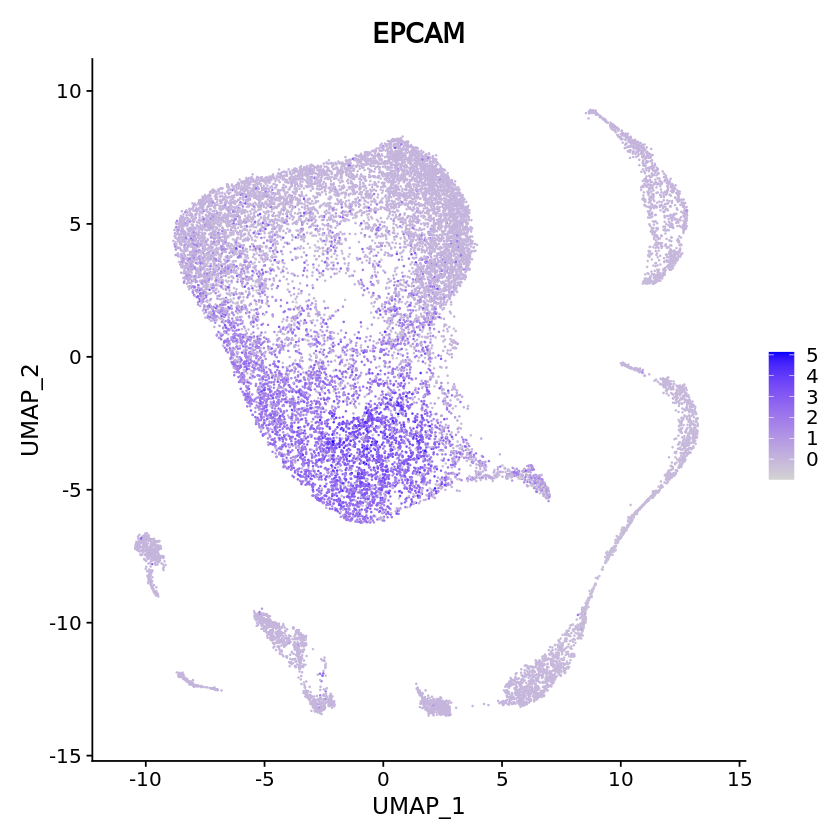

In [45]:
FeaturePlot(stacas, reduction = "umap",features=c("EPCAM"))

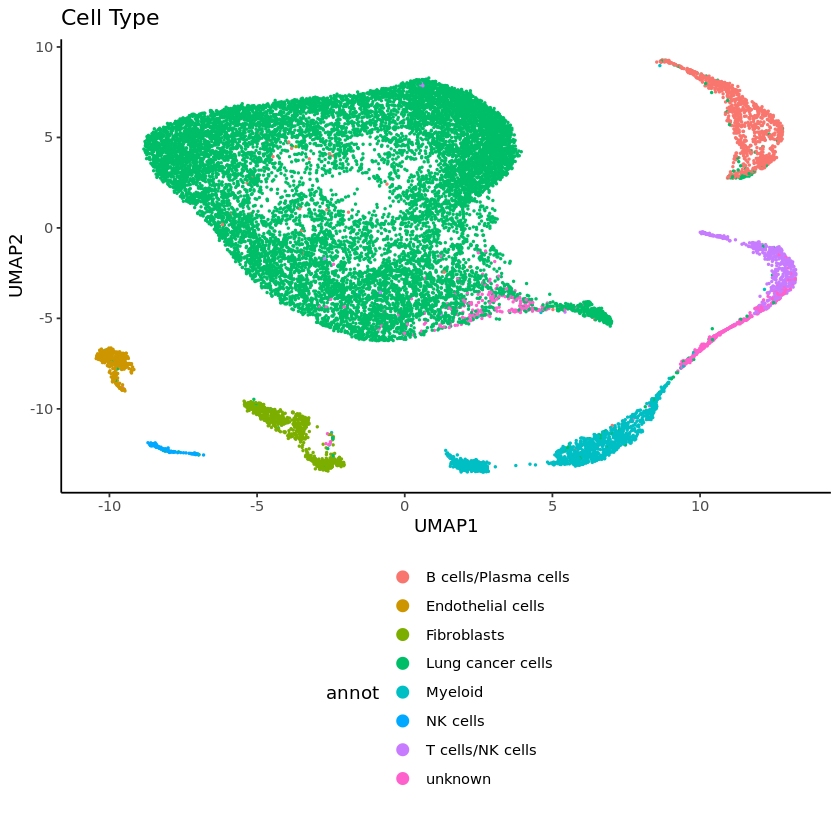

In [87]:
scvi_dense_full<-cbind(stacas[["umap"]]@cell.embeddings,annot[["X1"]],stacas$patient)
colnames(scvi_dense_full) <- c("X0","X1","annot",'orig.ident')

ggplot(shuf(as.data.frame(scvi_dense_full)), aes(x=as.double(X0), y=as.double(X1),color=annot)) + ggtitle("Cell Type")+xlab("UMAP1")+ylab("UMAP2")+geom_point(size=.3) +theme_classic()+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
#ggsave(g,file="figures/NSCL_5p_stacas_celltype.eps",device="eps")

In [50]:
g<-ggplot(shuf(as.data.frame(scvi_dense_full)), aes(x=as.double(X0), y=as.double(X1),color=orig.ident)) + ggtitle("Sample Origin")+xlab("UMAP1")+ylab("UMAP2")+geom_point(size=.3) +theme_classic()+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
ggsave(g,file="figures/NSCL_5p_stacas_origin.eps",device="eps")

Saving 6.67 x 6.67 in image



In [45]:
pcs=prcomp(t(as.matrix(stacas@assays$integrated[c(1:8000)])),rank=20)

In [46]:
#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.931796

In [51]:
g<-ggplot(as.data.frame(stacas[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("Mean LISI Score: 1.93")+ ggtitle("Mean LISI score: 1.23")+theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())
ggsave(g,file="figures/NSCL_5p_stacas_LISI.eps",device="eps")

Saving 6.67 x 6.67 in image



### FastMNN

In [34]:
NSCL_merged <- NormalizeData(NSCL_merged)
NSCL_merged <- FindVariableFeatures(NSCL_merged)

In [48]:
NSCL_merged <- RunFastMNN(object.list = SplitObject(NSCL_merged,split.by='orig.ident'),features=rownames(NSCL_merged))

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from mnn.reconstructed_ to mnnreconstructed_”


In [49]:
NSCL_merged@assays$mnn.reconstructed

Assay data with 8000 features for 19136 cells
Top 10 variable features:
 AP006222.2, SAMD11, HES4, ISG15, AGRN, RNF223, TNFRSF18, TNFRSF4, SDF4,
C1QTNF12 

In [50]:
NSCL_merged <- RunUMAP(NSCL_merged, reduction = "mnn", dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:36:23 UMAP embedding parameters a = 0.9922 b = 1.112

17:36:23 Read 19136 rows and found 30 numeric columns

17:36:23 Using Annoy for neighbor search, n_neighbors = 30

17:36:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:36:25 Writing NN index file to temp file /tmp/RtmpIypOty/fileb97308093aa

17:36:25 Searching Annoy index using 1 thread, search_k = 3000

17:36:30 Annoy recall = 100%

17:36:31 Commencing smooth kNN distance calibration using 1 thread

17:36:32 Initializing fro

In [51]:
NSCL_merged <- FindNeighbors(NSCL_merged, reduction = "mnn", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [52]:
NSCL_merged <- FindClusters(NSCL_merged)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19136
Number of edges: 626055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8911
Number of communities: 26
Elapsed time: 2 seconds


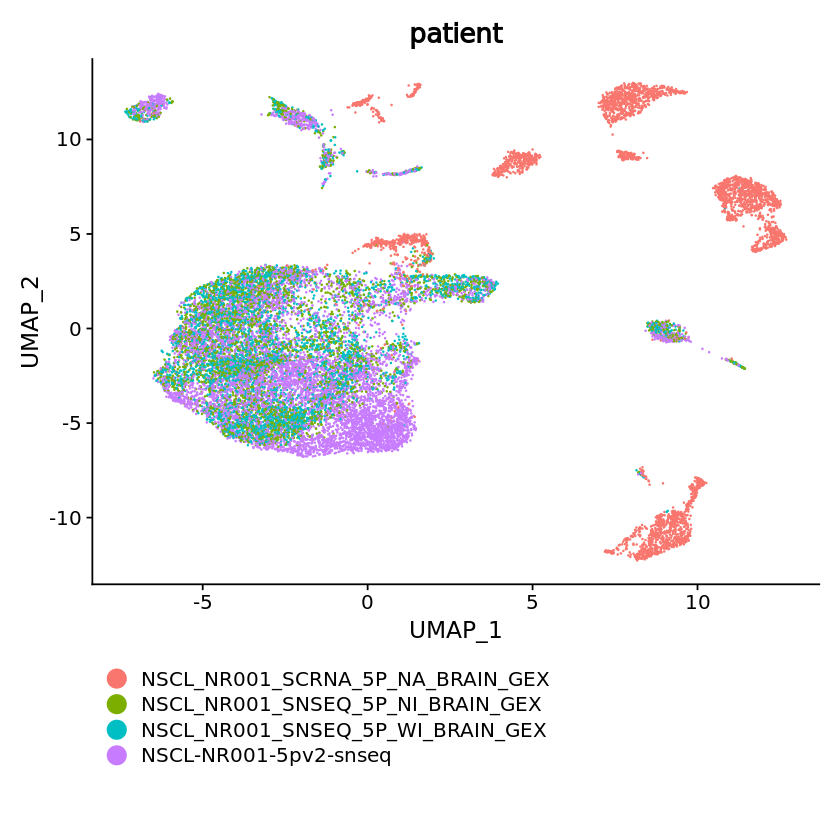

In [53]:
DimPlot(NSCL_merged, group.by = c("patient"), ncol = 1, shuffle=TRUE)+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 6, override.aes = list(size=5)))



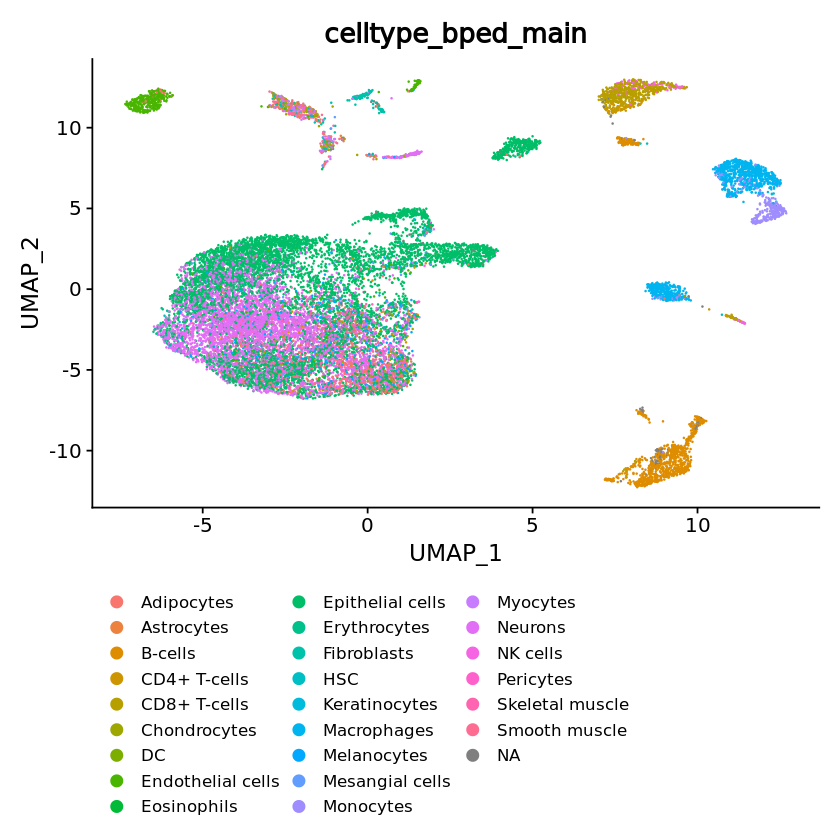

In [54]:
DimPlot(NSCL_merged, group.by = c("celltype_bped_main"), ncol = 1, shuffle=TRUE)+theme(legend.text=element_text(size=10),legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))

In [55]:
#evaluate batch effect using lisi score

umap_coords=NSCL_merged[["umap"]]@cell.embeddings

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 2.043147

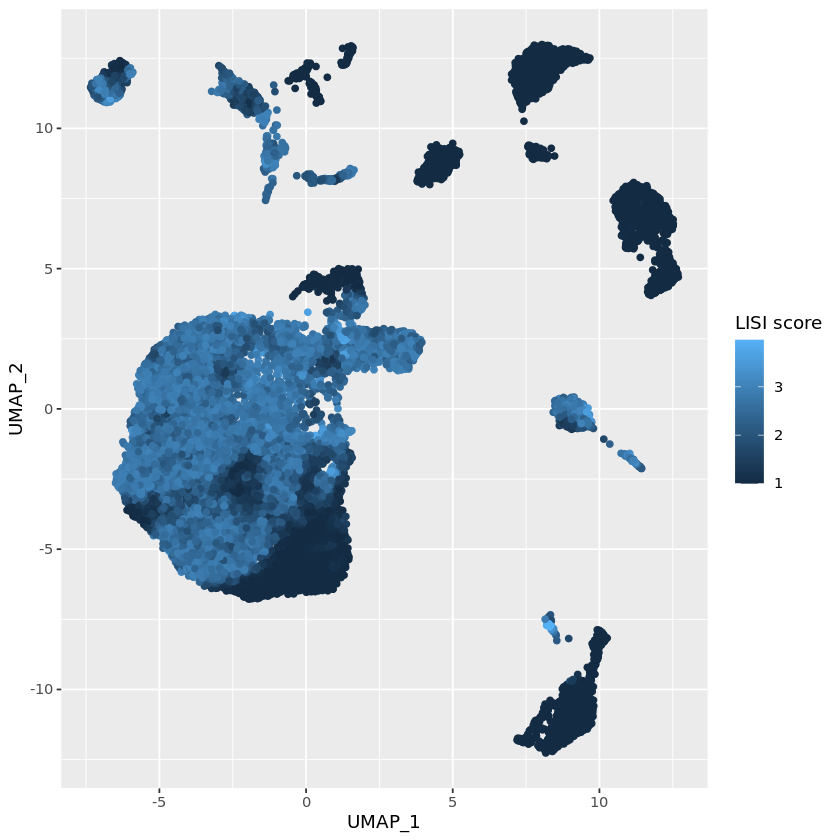

In [56]:
ggplot(as.data.frame(umap_coords), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 

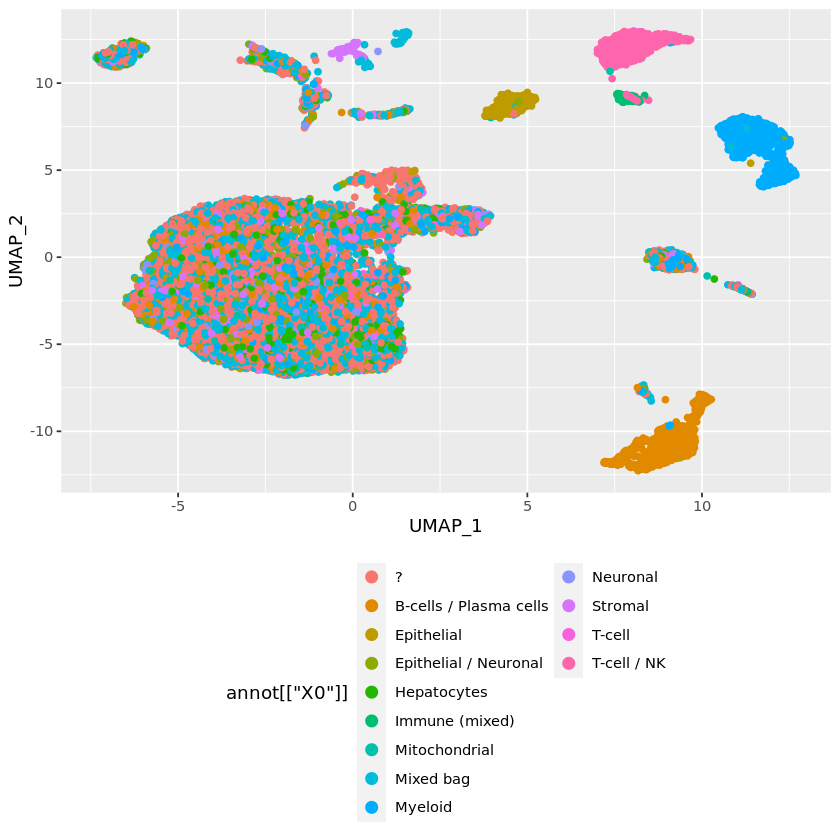

In [8]:
NSCL_merged=readRDS("ribas/NSCL/NSCL_5p_fastMNN.rds")

ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X0"]])) + 
  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [57]:
#evaluate batch effect using lisi score

umap_coords=NSCL_merged[["mnn"]]@cell.embeddings

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.903872

In [74]:
pcs=prcomp(t(as.matrix(NSCL_merged@assays$mnn.reconstructed[c(1:8000)])),rank=20)

#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

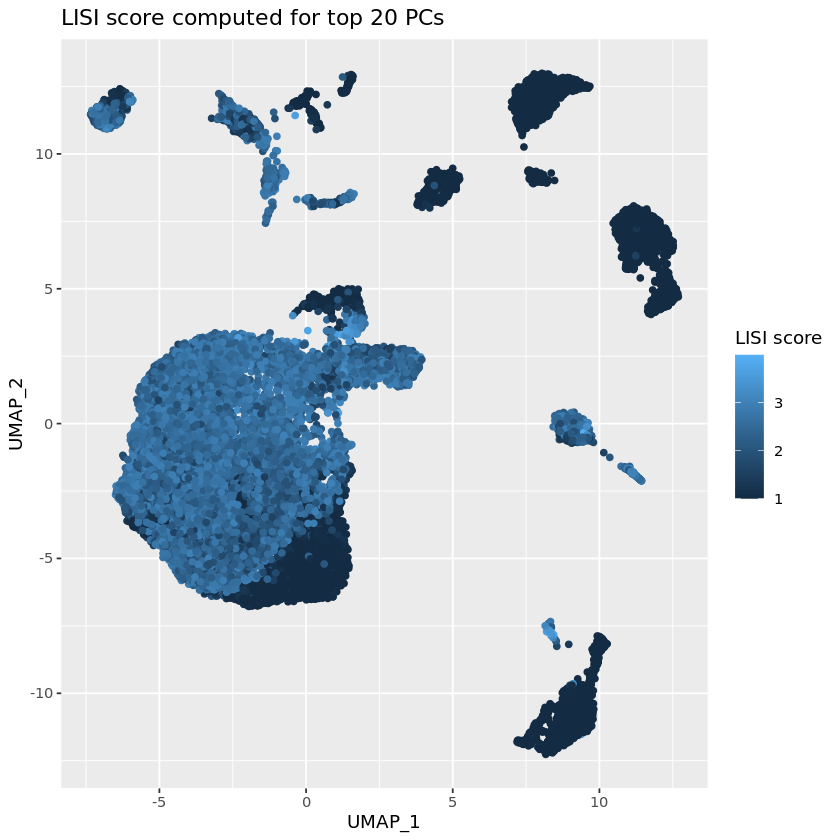

In [81]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("LISI score computed for top 20 PCs")

### LISI for SCVI and Scanorama

In [2]:
scvi_latent <- read.csv("ribas/NSCL/NSCL_5p_scvi_latent_components.csv")

In [9]:
scvi_latent_umap <- read.csv("ribas/NSCL/NSCL_5p_scvi_latent_umap.csv")

In [20]:
scvi_cells <- read.csv("ribas/NSCL_SCVI_5p_orig.ident.csv")

scvi_dense <- read.csv("ribas/NSCL/NSCL_5p_scvi_dense_pcs.csv")

scvi_dense_umap <- read.csv("ribas/NSCL/NSCL_5p_scvi_dense_umap.csv")

In [6]:
tmp <- c()
for (i in 1:29)
    {
    tmp <- append(tmp, paste("X",toString(i),sep=""))
}

In [7]:
#evaluate batch effect using lisi score

umap_coords=scvi_latent[tmp]

labels <- scvi_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.771678

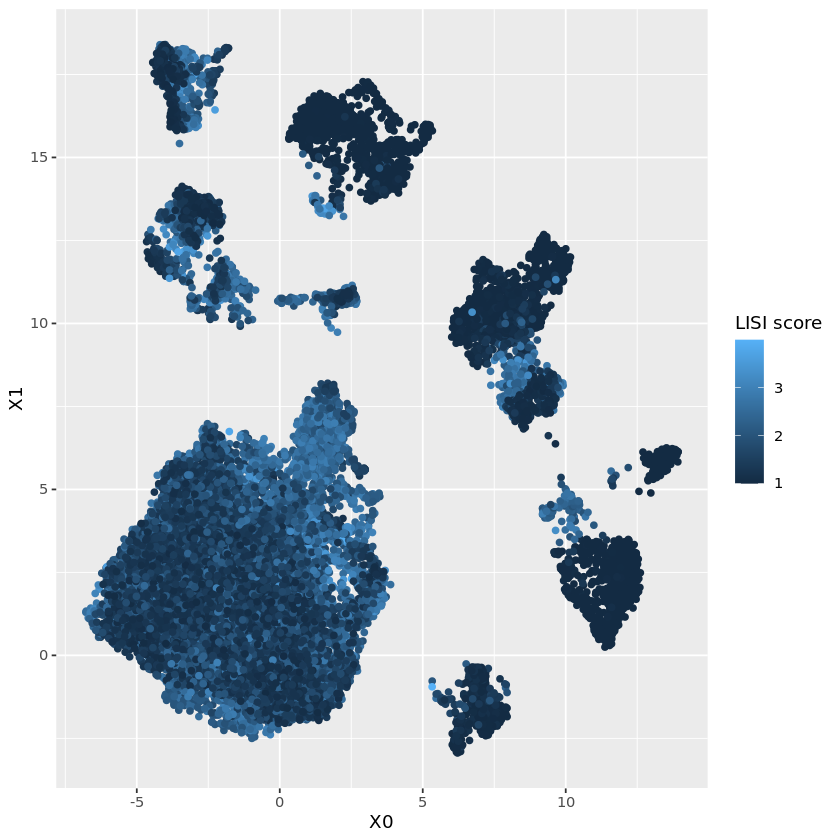

In [8]:
ggplot(scvi_latent_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 


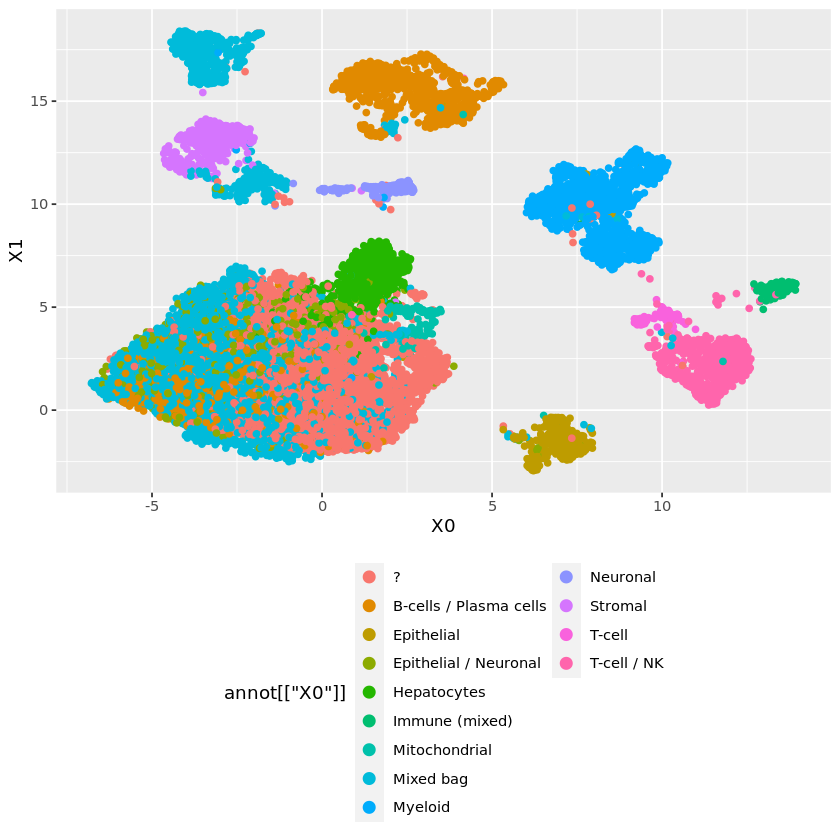

In [11]:
ggplot(scvi_latent_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [33]:
umap_coords=scvi_dense[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")]

labels <- scvi_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 2.045172

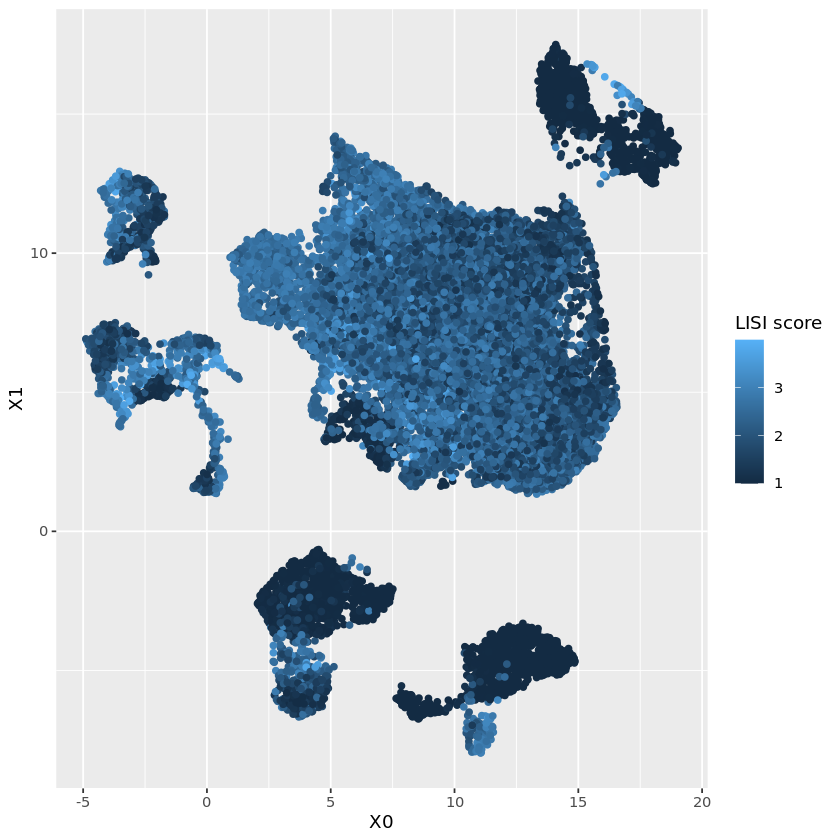

In [34]:
ggplot(scvi_dense_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 

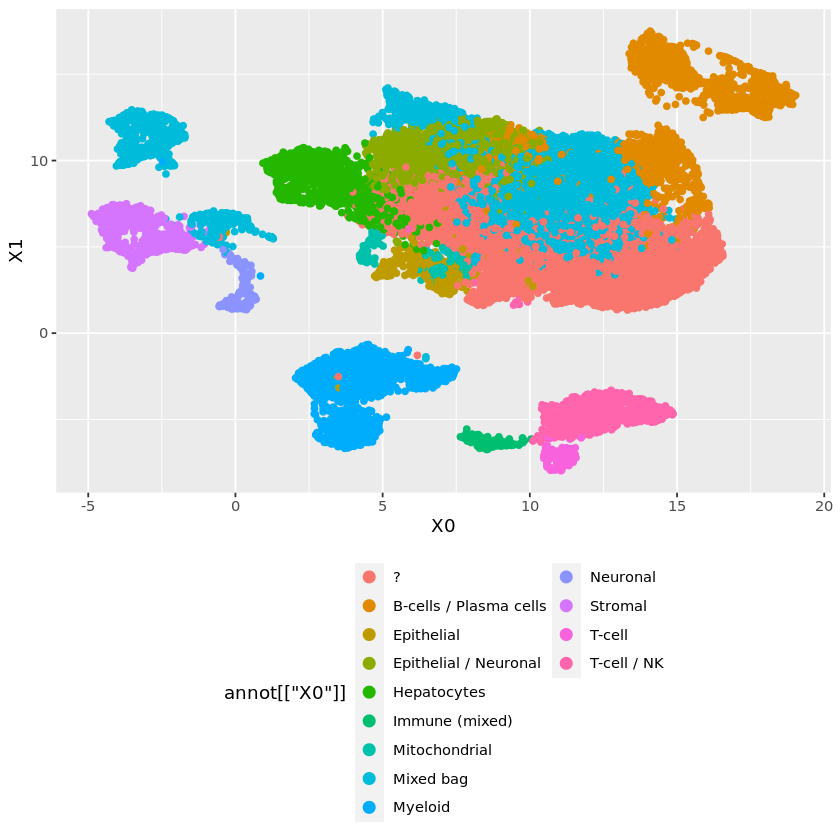

In [34]:
ggplot(scvi_dense_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [40]:
for (i in scvi_cells[["orig.ident"]]){
    if (i=="NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX"){
        #/print(i)
    }
}


In [42]:
scvi_cells <- read.csv("ribas/NSCL_SCVI_5p_orig.ident.csv")
scvi_dense <- read.csv("ribas/NSCL/NSCL_5p_scvi_dense_pcs.csv")
scvi_dense_umap <- read.csv("ribas/NSCL/NSCL_5p_scvi_dense_umap.csv")

scvi_dense_full<-cbind(scvi_dense_umap,annot[["X0"]],scvi_cells[['orig.ident']])
colnames(scvi_dense_full) <- c("X","X0","X1","annot",'orig.ident')

In [59]:
g<-ggplot(shuf(scvi_dense_full), aes(x=X0, y=X1,color=annot)) + ggtitle("Cell Type")+xlab("UMAP1")+ylab("UMAP2")+geom_point(size=.3) +theme_classic()+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
ggsave(g,file="NSCL_5p_scvi_dense_celltypes.eps",device="eps")

Saving 6.67 x 6.67 in image



In [60]:
g<-ggplot(shuf(scvi_dense_full), aes(x=X0, y=X1,color=orig.ident)) + ggtitle("Sample Origin")+xlab("UMAP1")+ylab("UMAP2")+ geom_point(size=.3)+theme_classic() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
ggsave(g,file="NSCL_5p_scvi_dense_origin.eps",device="eps")

Saving 6.67 x 6.67 in image



In [13]:
#scano_latent <- read.csv("ribas/NSCL/NSCL_5p_scanorama_latent_components.csv")
scano_latent_umap <- read.csv("ribas/NSCL/NSCL_5p_scanorama_latent_umap.csv")

In [25]:
scano_cells <- read.csv("ribas/NSCL_SCANORAMA_5p_orig.ident.csv")

In [26]:
tmp <- c()
for (i in 1:99)
    {
    tmp <- append(tmp, paste("X",toString(i),sep=""))
}

In [27]:
umap_coords=scano_latent[tmp]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.751316

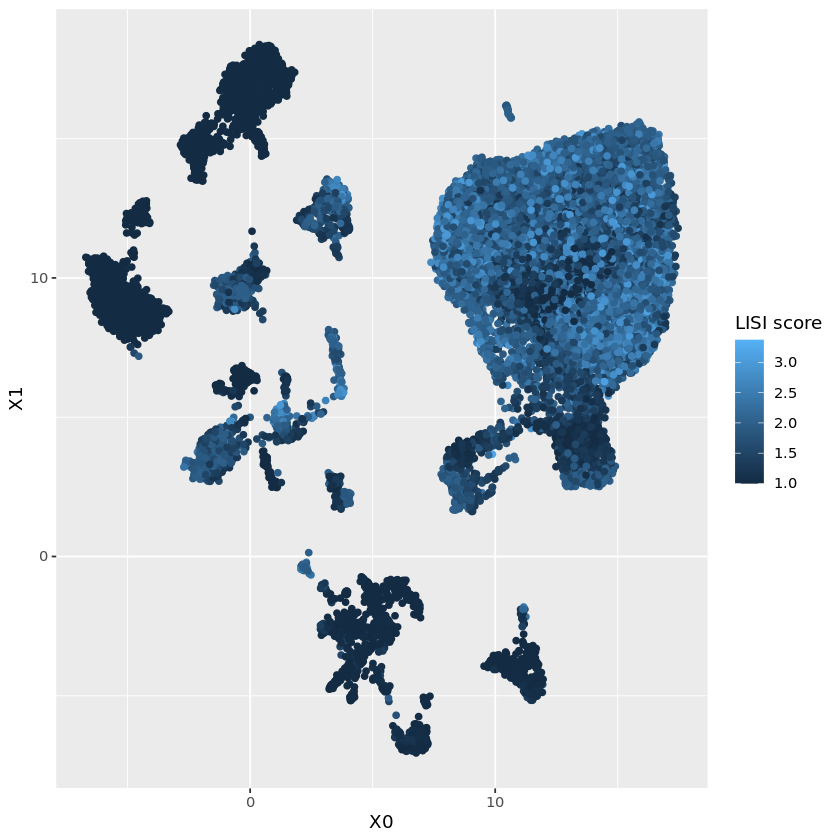

In [28]:
ggplot(scano_latent_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 

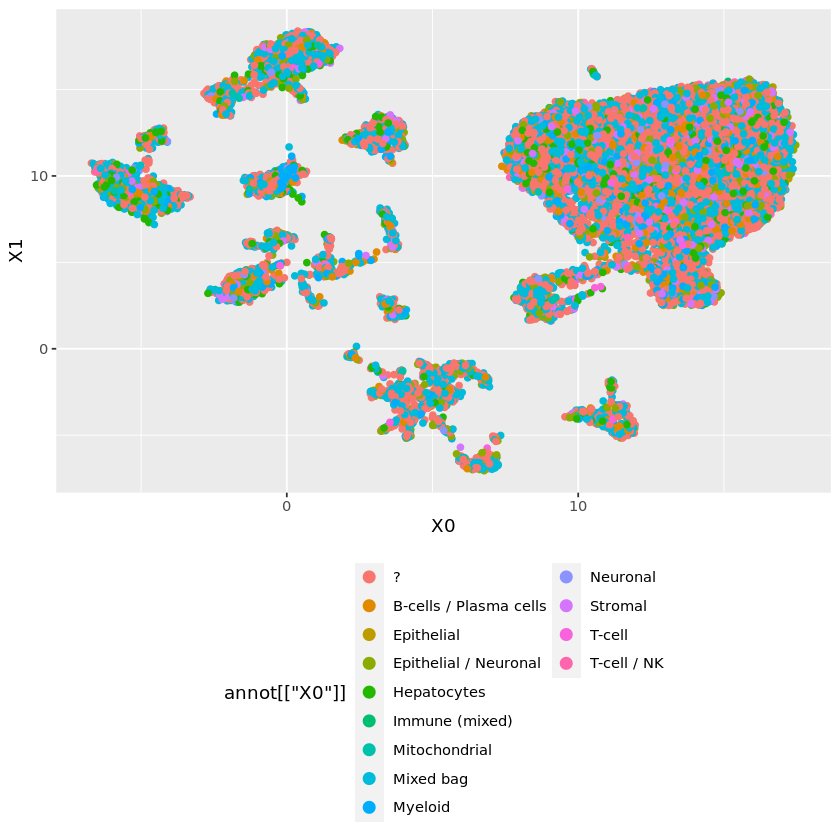

In [14]:
ggplot(scano_latent_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [15]:
#scano_dense <- read.csv("ribas/NSCL/NSCL_5p_scanorama_dense_pcs.csv")
scano_dense_umap <- read.csv("ribas/NSCL/NSCL_5p_scanorama_dense_umap.csv")

In [30]:
tmp <- c()
for (i in 1:19)
    {
    tmp <- append(tmp, paste("X",toString(i),sep=""))
}

In [31]:
umap_coords=scano_dense[tmp]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.7203

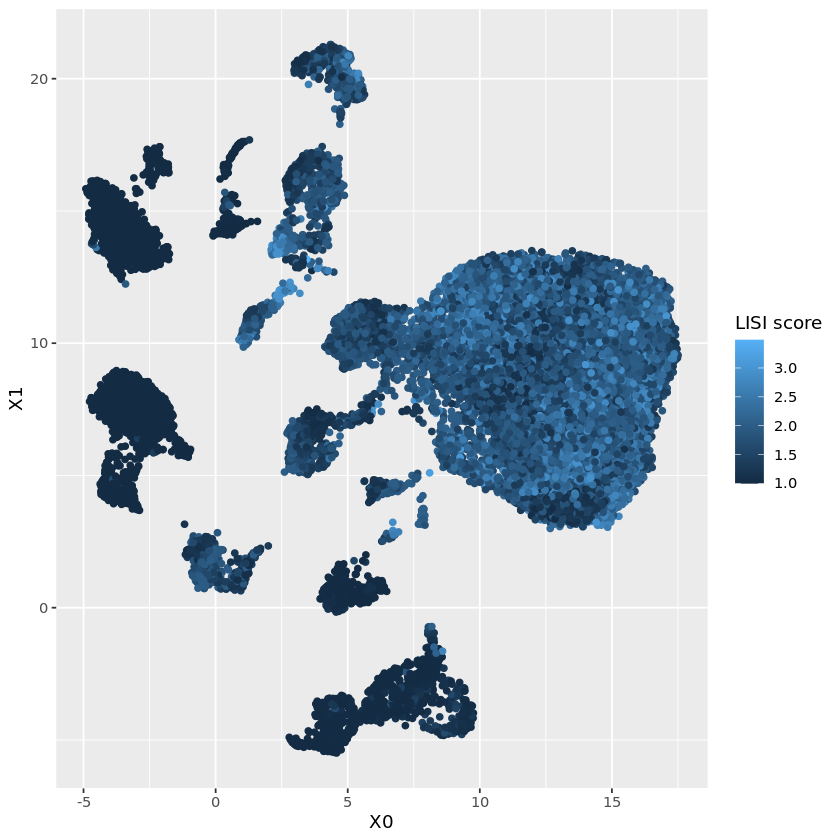

In [32]:
ggplot(scano_dense_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 

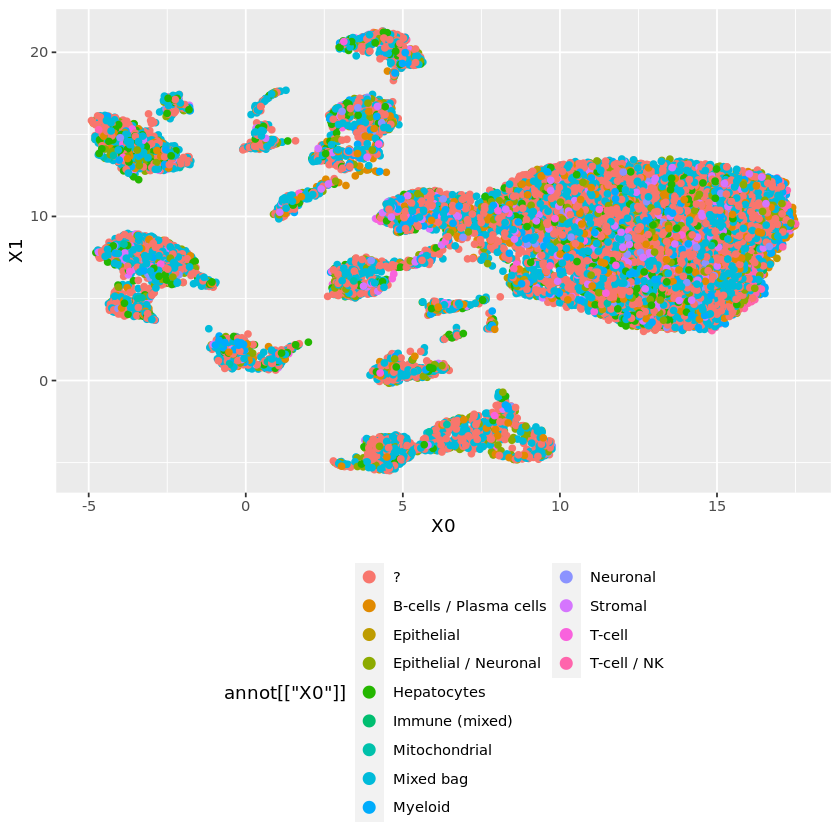

In [16]:
ggplot(scano_dense_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [41]:
raw <- read.csv("ribas/NSCL/NSCL_5p_merged_NO_BATCH_pcs.csv")

In [17]:
raw_umap <- read.csv("ribas/NSCL/NSCL_5p_raw_umap.csv")

In [43]:
umap_coords=raw[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.514681

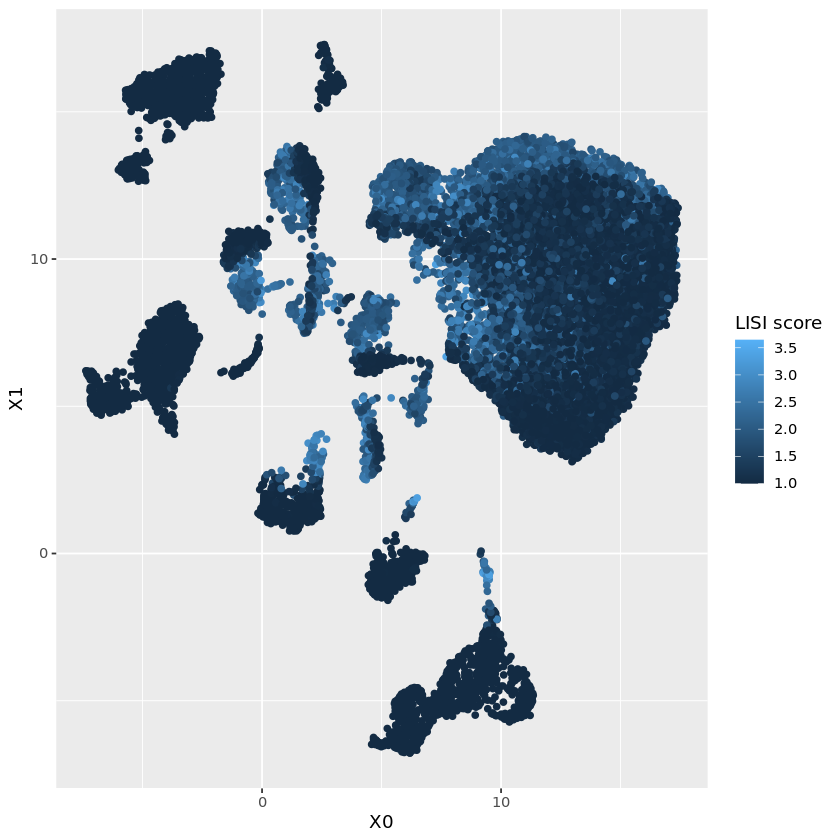

In [44]:
ggplot(raw_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 

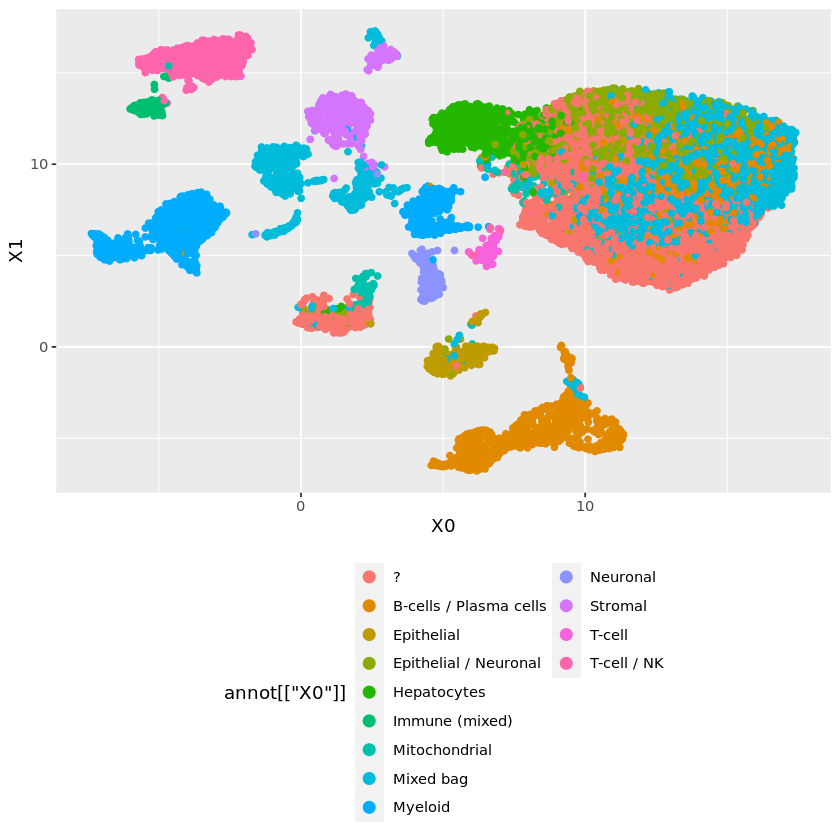

In [18]:
ggplot(raw_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### kBet

In [21]:
library(kBET)

In [ ]:
batch.estimate <- kBET(as.matrix(NSCL_merged@assays$RNA@data),NSCL_merged@meta.data$patient)

In [22]:
NSCL_merged_split <- SplitObject(NSCL_merged,split.by='orig.ident')

In [39]:
sample <- as.data.frame(NSCL_merged_split[1])
batch <- names(sample)
subset_size <- 0.1 #subsample to 10% of the data
subset_id <- sample.int(n = length(batch), size = floor(subset_size * length(batch)), replace=FALSE)

In [37]:
nrow(sample)

NULL

In [41]:
sample <- as.matrix(NSCL_merged_split[1])